<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/Racial_Wealth_Gap_Policy_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

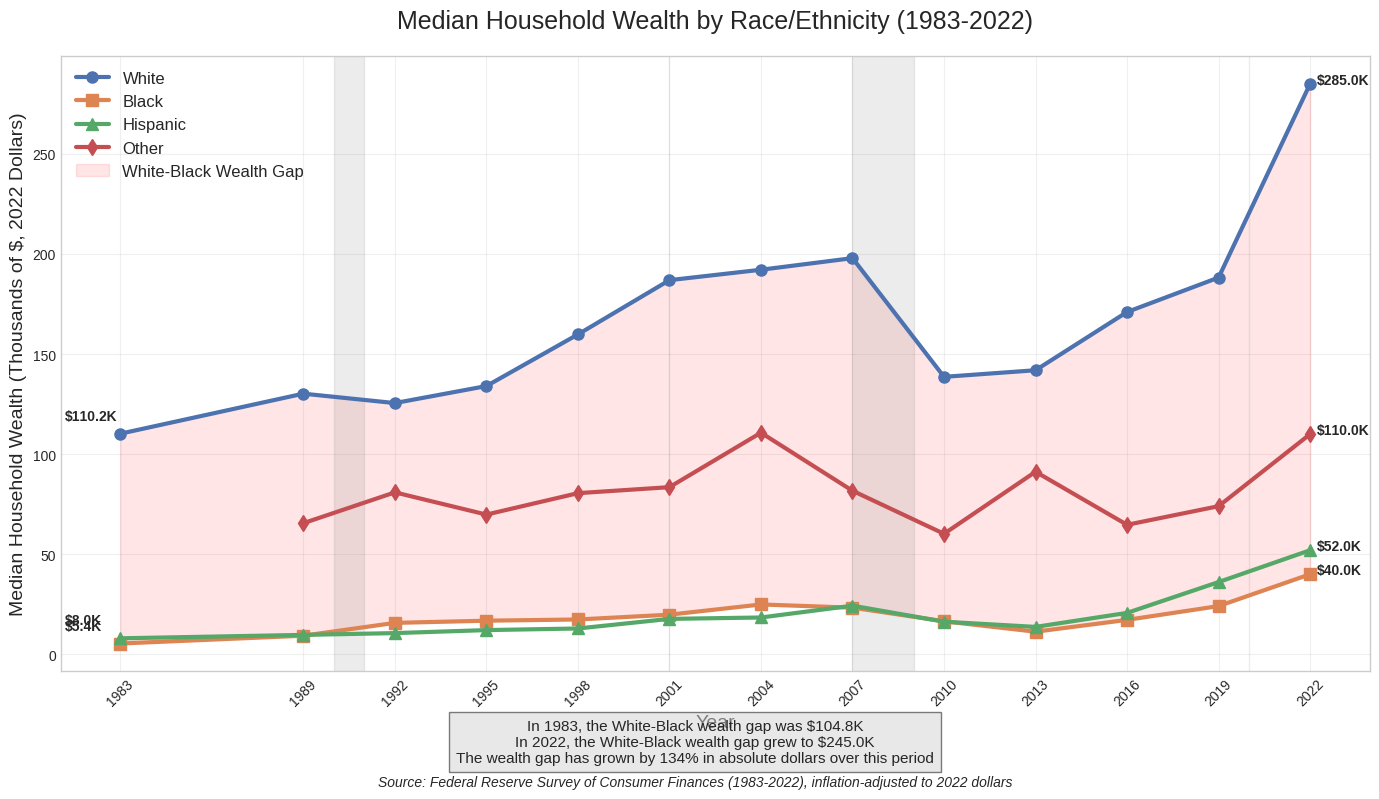

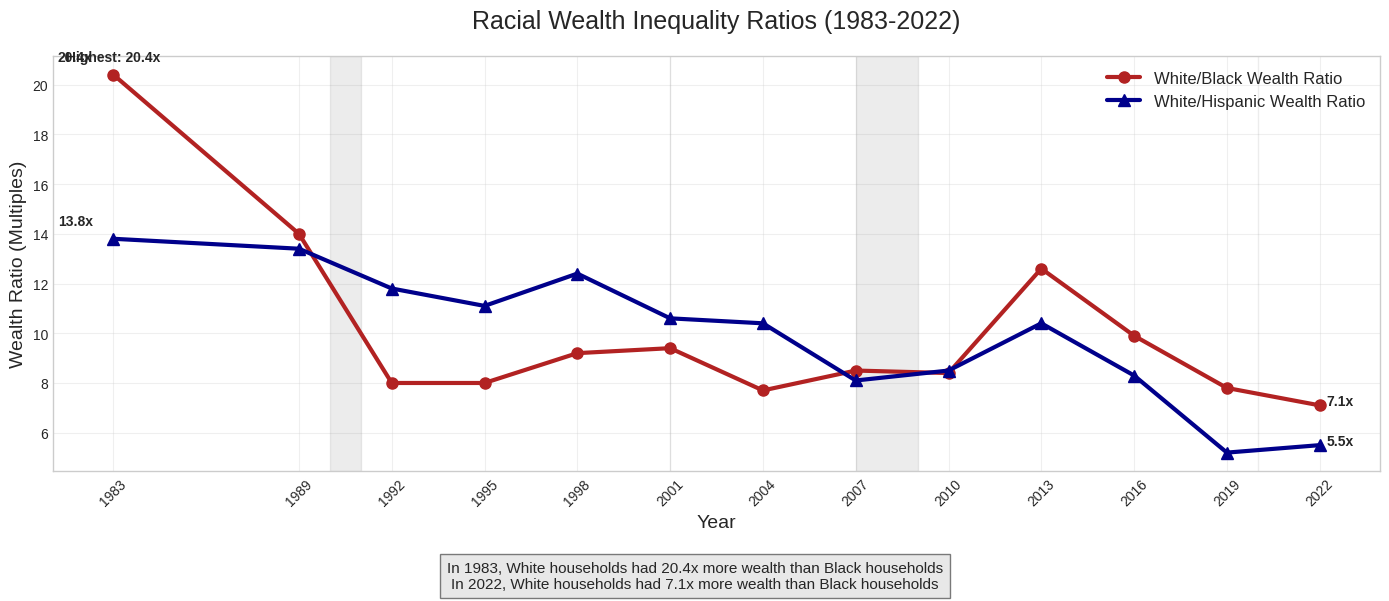

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Data on median household wealth by race (in thousands of dollars)
# Source: Federal Reserve's Survey of Consumer Finances (earliest available data to present)
# The SCF began collecting comprehensive racial wealth data in 1983
years = [1983, 1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022]

# Median net worth by race/ethnicity in thousands of dollars (adjusted to 2022 dollars)
white = [110.2, 130.2, 125.5, 134.0, 159.8, 186.9, 192.1, 197.9, 138.6, 141.9, 171.0, 188.2, 285.0]
black = [5.4, 9.3, 15.7, 16.8, 17.4, 19.8, 24.9, 23.3, 16.5, 11.3, 17.2, 24.1, 40.0]
hispanic = [8.0, 9.7, 10.6, 12.1, 12.9, 17.7, 18.4, 24.3, 16.3, 13.7, 20.7, 36.1, 52.0]
# Note: "Other" category wasn't consistently tracked until later surveys
other = [None, 65.5, 80.9, 69.8, 80.5, 83.5, 110.7, 81.7, 60.2, 91.2, 64.7, 74.0, 110.0]

# Create a DataFrame
data = pd.DataFrame({
    'Year': years,
    'White': white,
    'Black': black,
    'Hispanic': hispanic,
    'Other': other
})

# Create the figure
plt.figure(figsize=(14, 8))

# Plot the lines
plt.plot(data['Year'], data['White'], marker='o', linewidth=3, markersize=8, label='White')
plt.plot(data['Year'], data['Black'], marker='s', linewidth=3, markersize=8, label='Black')
plt.plot(data['Year'], data['Hispanic'], marker='^', linewidth=3, markersize=8, label='Hispanic')
# Plot Other category only for years with data
valid_other = data[~data['Other'].isna()]
plt.plot(valid_other['Year'], valid_other['Other'], marker='d', linewidth=3, markersize=8, label='Other')

# Add the wealth gap area
plt.fill_between(data['Year'], data['White'], data['Black'], color='red', alpha=0.1, label='White-Black Wealth Gap')

# Calculate gaps for initial and final years
initial_wb_gap = white[0] - black[0]
final_wb_gap = white[-1] - black[-1]
gap_growth = (final_wb_gap / initial_wb_gap)

initial_wh_gap = white[0] - hispanic[0]
final_wh_gap = white[-1] - hispanic[-1]

# Customize the chart
plt.title('Median Household Wealth by Race/Ethnicity (1983-2022)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Household Wealth (Thousands of $, 2022 Dollars)', fontsize=14)
plt.xticks(years, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# Add annotations for 1983 (first year)
plt.annotate(f"${white[0]}K", (years[0], white[0]), textcoords="offset points",
             xytext=(-40,10), ha='left', fontweight='bold')
plt.annotate(f"${black[0]}K", (years[0], black[0]), textcoords="offset points",
             xytext=(-40,10), ha='left', fontweight='bold')
plt.annotate(f"${hispanic[0]}K", (years[0], hispanic[0]), textcoords="offset points",
             xytext=(-40,10), ha='left', fontweight='bold')

# Add annotations for 2022 (last year)
plt.annotate(f"${white[-1]}K", (years[-1], white[-1]), textcoords="offset points",
             xytext=(5,0), ha='left', fontweight='bold')
plt.annotate(f"${black[-1]}K", (years[-1], black[-1]), textcoords="offset points",
             xytext=(5,0), ha='left', fontweight='bold')
plt.annotate(f"${hispanic[-1]}K", (years[-1], hispanic[-1]), textcoords="offset points",
             xytext=(5,0), ha='left', fontweight='bold')
if other[-1] is not None:
    plt.annotate(f"${other[-1]}K", (years[-1], other[-1]), textcoords="offset points",
                xytext=(5,0), ha='left', fontweight='bold')

# Add a note about the wealth gap
plt.figtext(0.5, 0.01, "Source: Federal Reserve Survey of Consumer Finances (1983-2022), inflation-adjusted to 2022 dollars",
            ha="center", fontsize=10, style='italic')

# Add a textbox with key statistics
plt.figtext(0.5, 0.04,
            f"In 1983, the White-Black wealth gap was ${initial_wb_gap}K\n"
            f"In 2022, the White-Black wealth gap grew to ${final_wb_gap}K\n"
            f"The wealth gap has grown by {round((gap_growth-1)*100)}% in absolute dollars over this period",
            ha="center", fontsize=11, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

# Add recession indicators
recession_periods = [(1990, 1991), (2001, 2001), (2007, 2009), (2020, 2020)]
for start, end in recession_periods:
    plt.axvspan(start, end, color='gray', alpha=0.15)

# Adjust layout and save
plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.savefig('racial_wealth_inequality_historical.png', dpi=300, bbox_inches='tight')

# Calculate ratios manually to avoid DataFrame indexing issues
white_black_ratios = []
white_hispanic_ratios = []
for i in range(len(years)):
    wb_ratio = round(white[i]/black[i], 1) if black[i] is not None and black[i] > 0 else None
    wh_ratio = round(white[i]/hispanic[i], 1) if hispanic[i] is not None and hispanic[i] > 0 else None
    white_black_ratios.append(wb_ratio)
    white_hispanic_ratios.append(wh_ratio)

# Create a second figure for the historical ratios
plt.figure(figsize=(14, 6))
plt.plot(years, white_black_ratios, marker='o', linewidth=3,
         markersize=8, label='White/Black Wealth Ratio', color='firebrick')
plt.plot(years, white_hispanic_ratios, marker='^', linewidth=3,
         markersize=8, label='White/Hispanic Wealth Ratio', color='darkblue')

# Annotate the first and last points
plt.annotate(f"{white_black_ratios[0]}x",
             (years[0], white_black_ratios[0]),
             textcoords="offset points", xytext=(-40,10), ha='left', fontweight='bold')
plt.annotate(f"{white_black_ratios[-1]}x",
             (years[-1], white_black_ratios[-1]),
             textcoords="offset points", xytext=(5,0), ha='left', fontweight='bold')

plt.annotate(f"{white_hispanic_ratios[0]}x",
             (years[0], white_hispanic_ratios[0]),
             textcoords="offset points", xytext=(-40,10), ha='left', fontweight='bold')
plt.annotate(f"{white_hispanic_ratios[-1]}x",
             (years[-1], white_hispanic_ratios[-1]),
             textcoords="offset points", xytext=(5,0), ha='left', fontweight='bold')

plt.title('Racial Wealth Inequality Ratios (1983-2022)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wealth Ratio (Multiples)', fontsize=14)
plt.xticks(years, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper right')

# Show the highest ratio point
highest_wb_ratio = max(filter(None, white_black_ratios))  # Filter out None values
highest_wb_year = years[white_black_ratios.index(highest_wb_ratio)]
plt.annotate(f"Highest: {highest_wb_ratio}x",
             (highest_wb_year, highest_wb_ratio),
             textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

# Add recession indicators for this chart too
for start, end in recession_periods:
    plt.axvspan(start, end, color='gray', alpha=0.15)

plt.figtext(0.5, 0.01,
            f"In 1983, White households had {white_black_ratios[0]}x more wealth than Black households\n"
            f"In 2022, White households had {white_black_ratios[-1]}x more wealth than Black households",
            ha="center", fontsize=11, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.savefig('racial_wealth_inequality_ratios.png', dpi=300, bbox_inches='tight')
plt.show()

PROJECTED RACIAL WEALTH GAP IN 2055 UNDER DIFFERENT POLICIES
           Policy White Wealth in 2055 Black Wealth in 2055 Hispanic Wealth in 2055 White-Black Ratio White-Hispanic Ratio
   Current Trends         $1.1 Million         $0.1 Million            $0.2 Million              7.7x                 5.5x
     Sanders Plan         $0.8 Million         $0.3 Million            $0.4 Million              2.9x                 2.4x
      Warren Plan         $0.9 Million         $0.3 Million            $0.3 Million              3.4x                 2.8x
       Biden Plan         $1.0 Million         $0.2 Million            $0.2 Million              5.9x                 4.4x
Build Back Better         $0.9 Million         $0.2 Million            $0.3 Million              4.6x                 3.5x
    Walz Policies         $0.9 Million         $0.2 Million            $0.3 Million              4.1x                 3.3x

Starting point in 2025:
• White: $0.3 Million
• Black: $0.0 Million
• Hispani

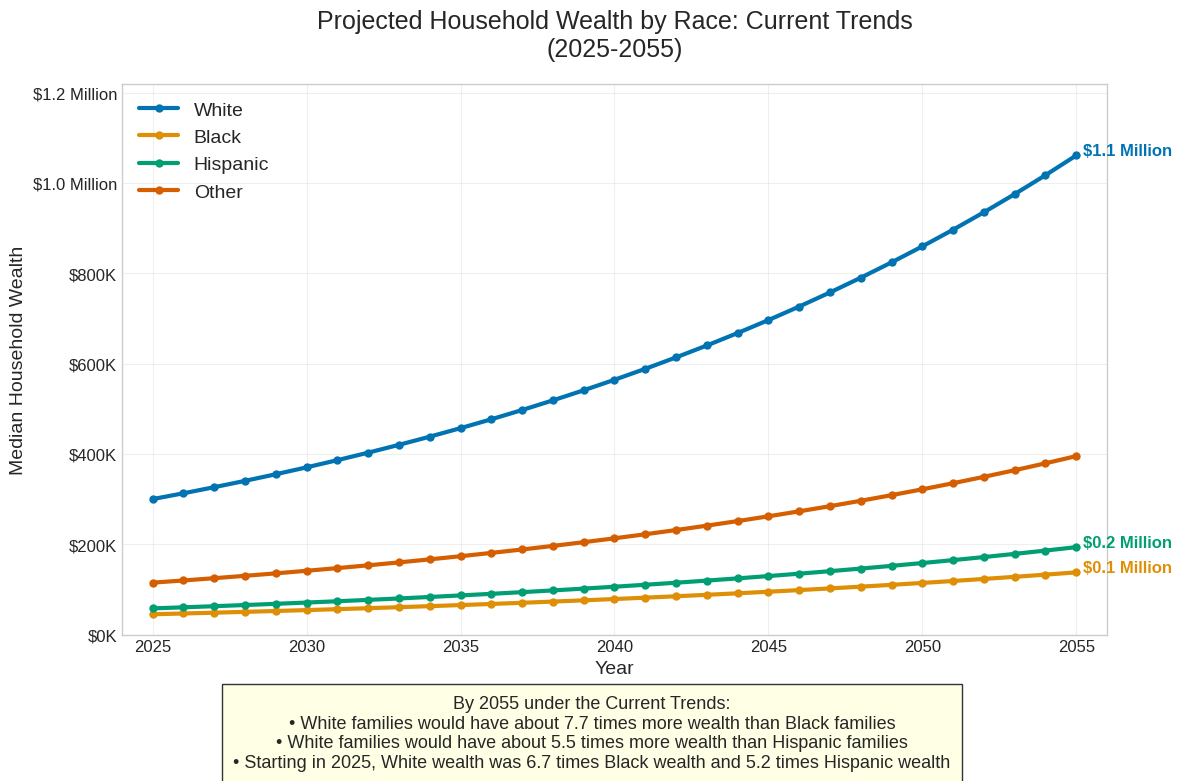

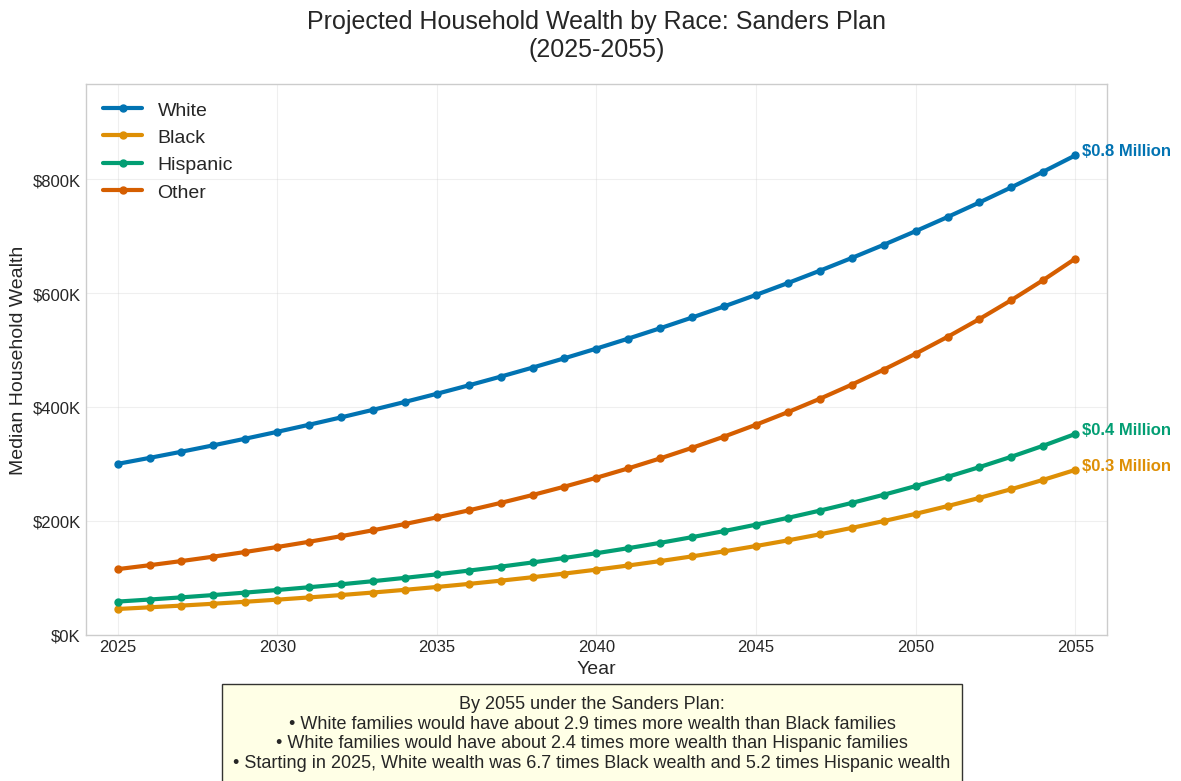

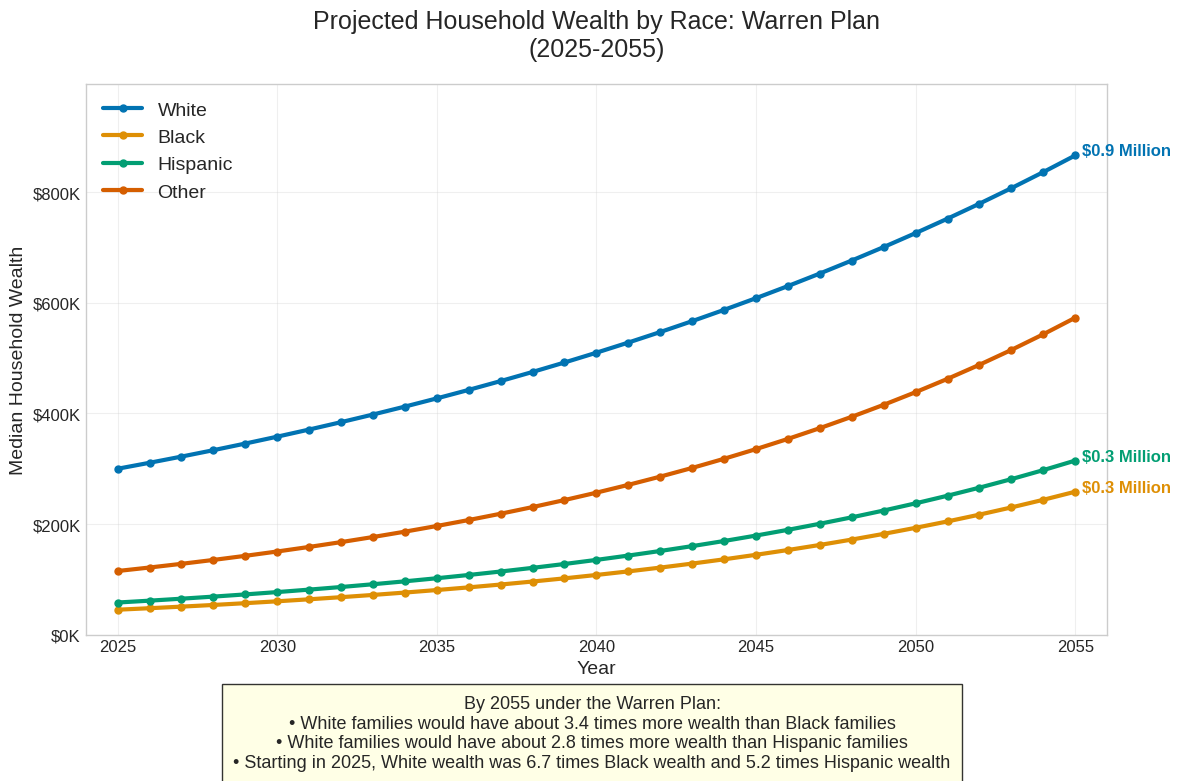

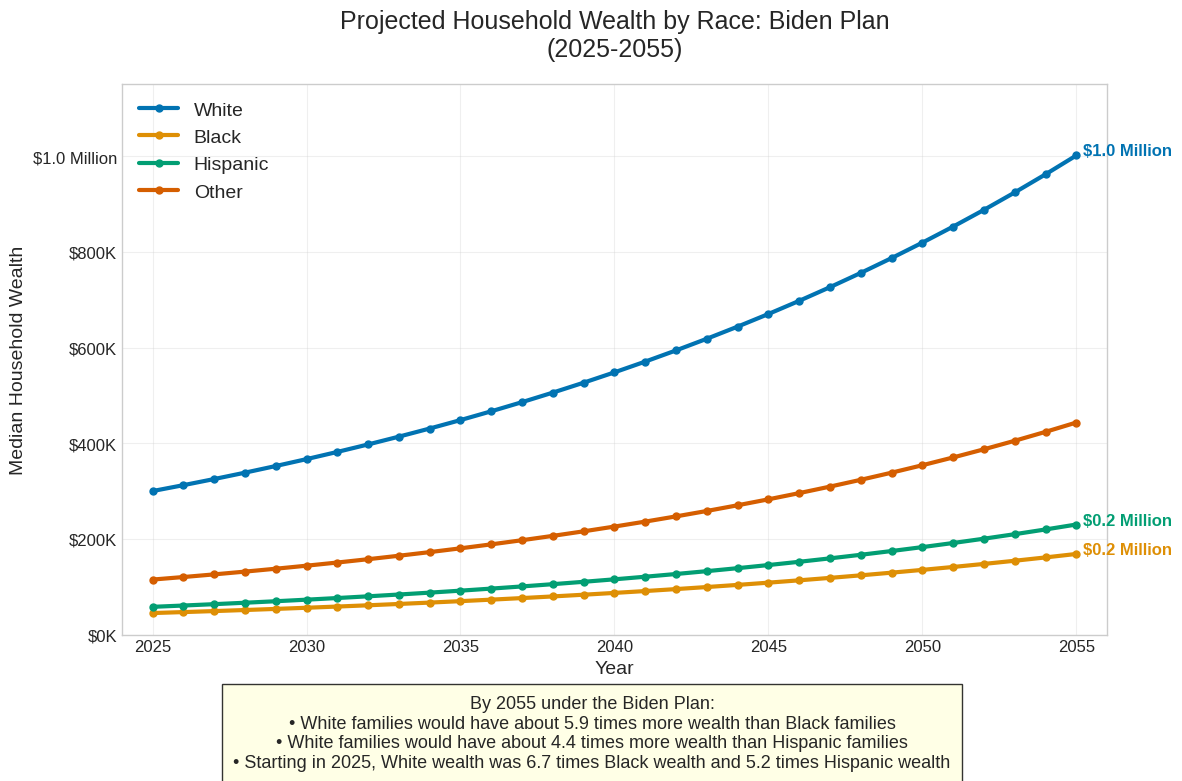

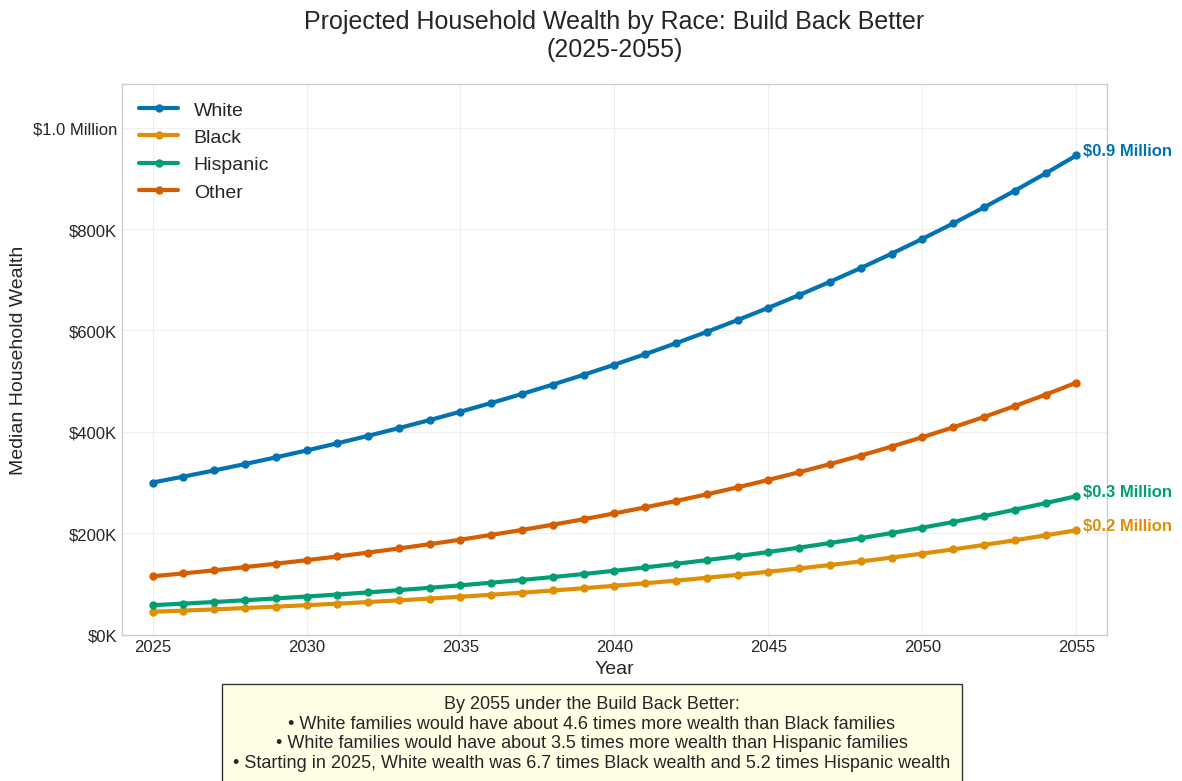

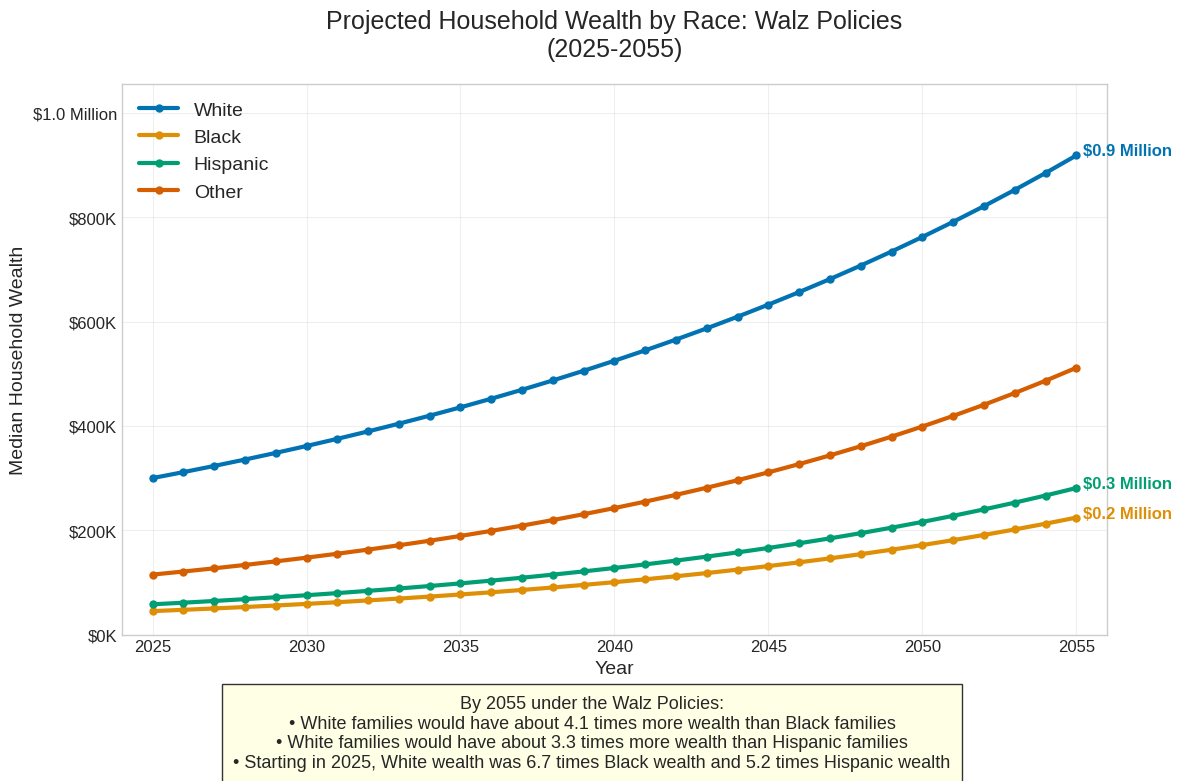

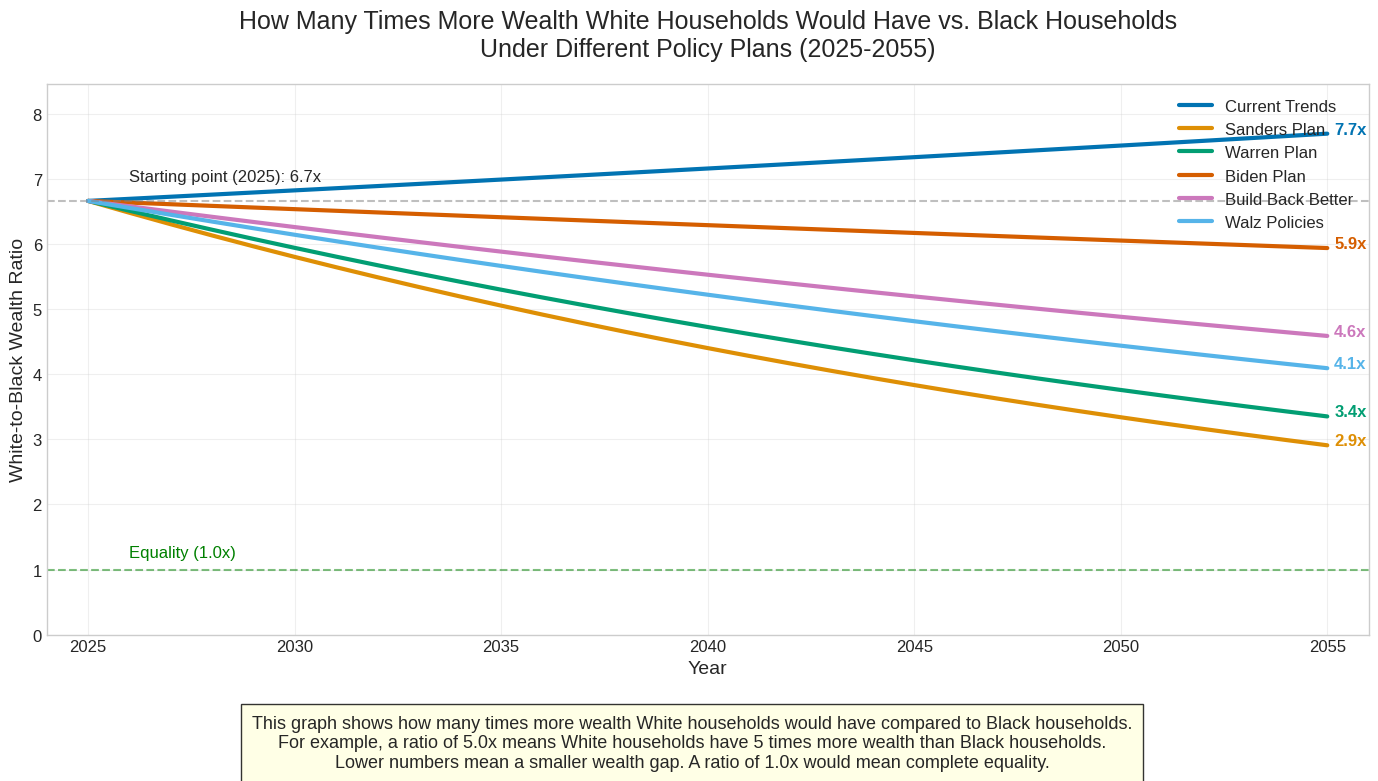

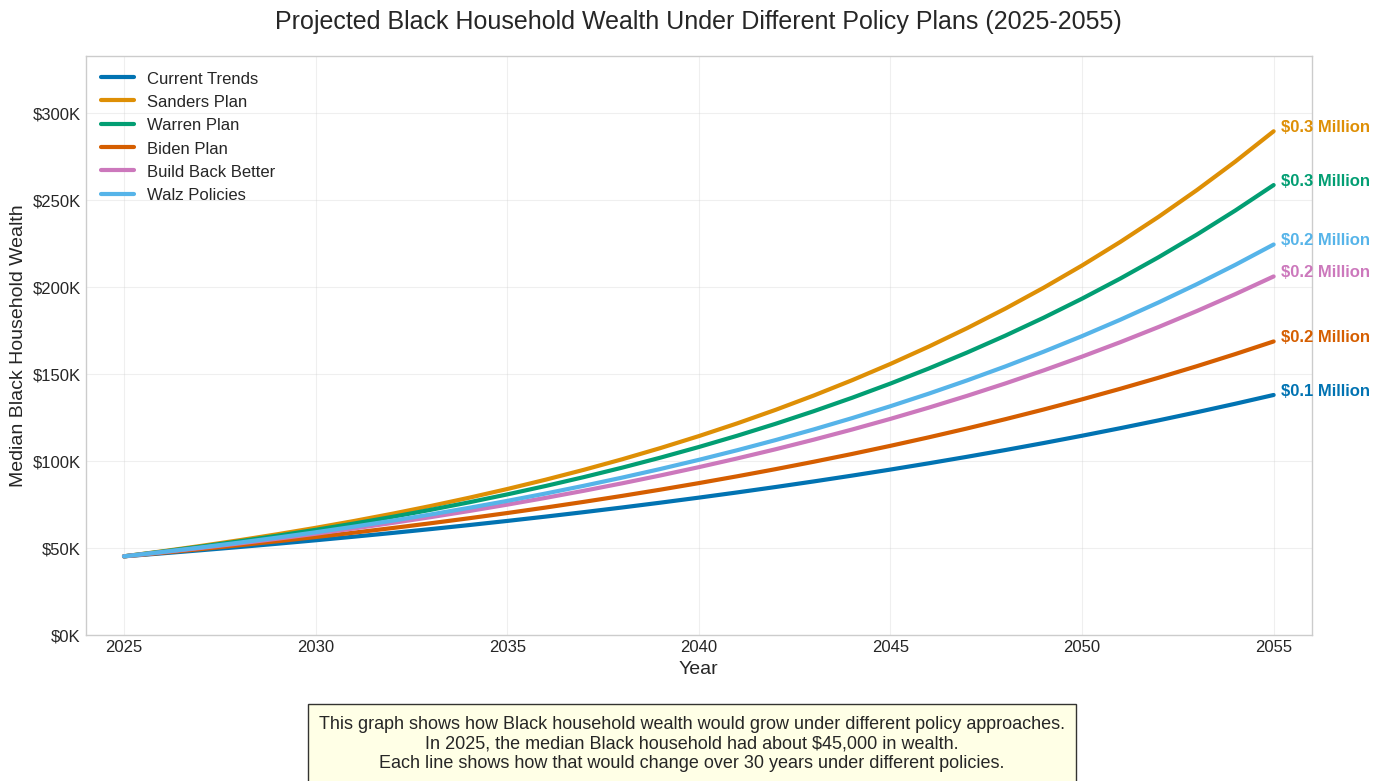

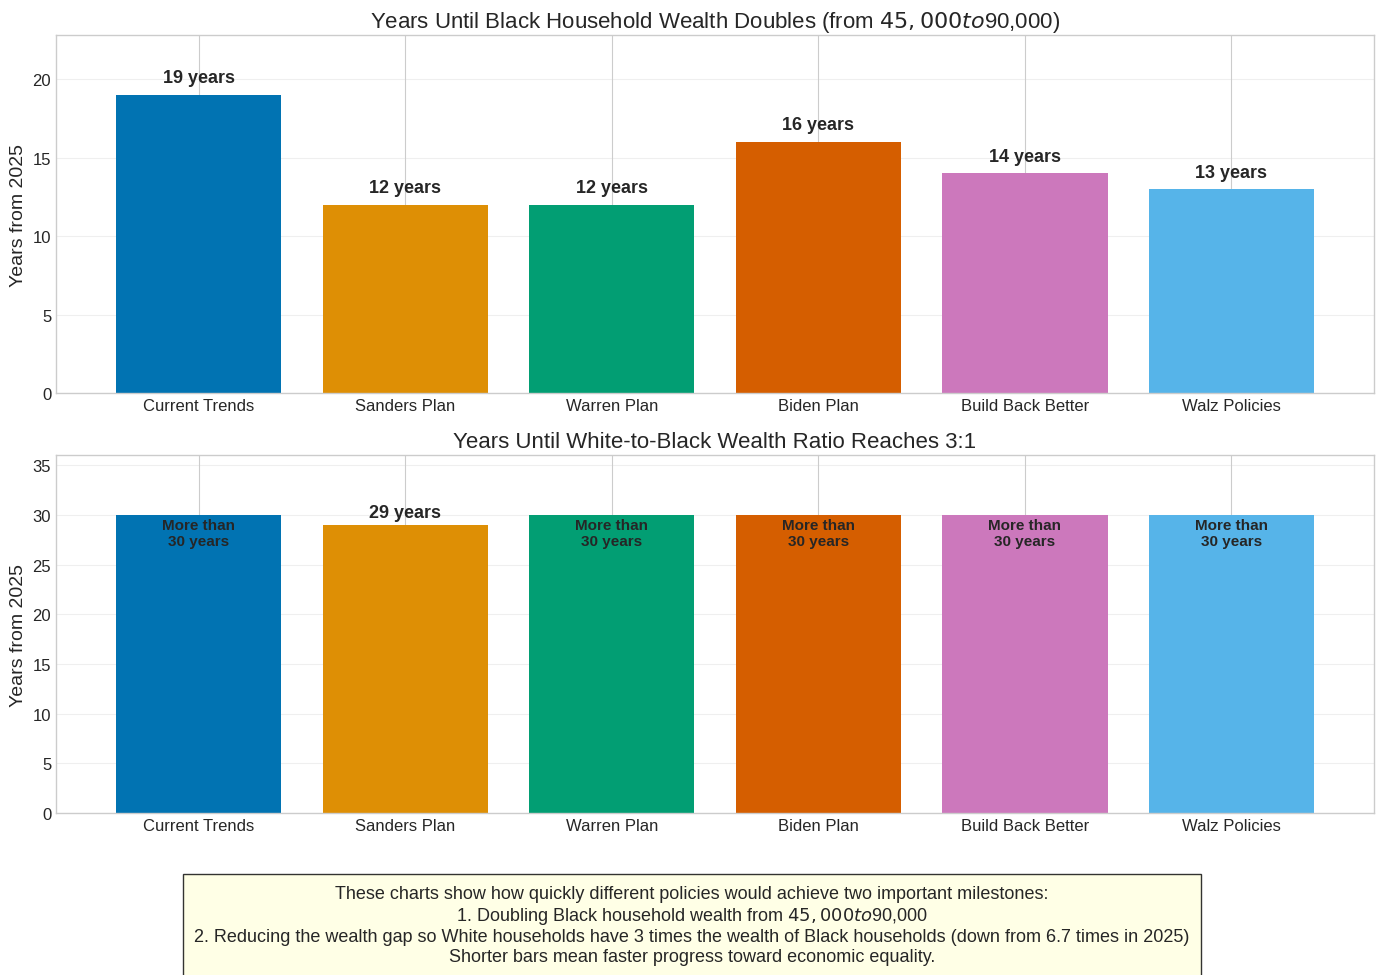

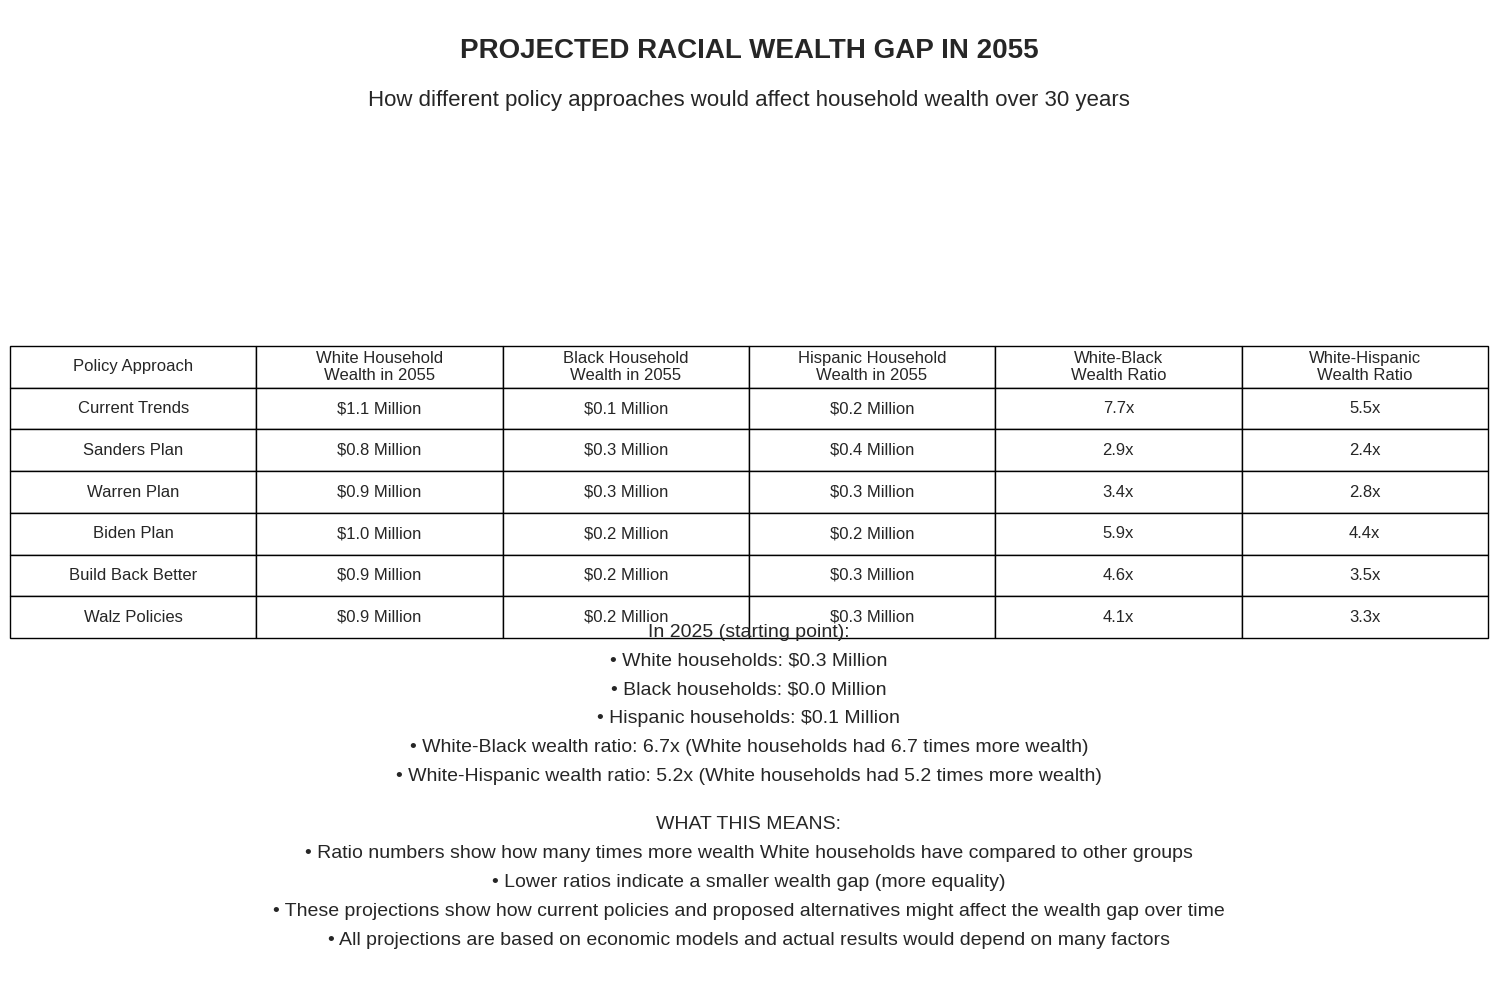

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib.font_manager import FontProperties

# Set the style for better readability
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

# Current data (2022-2025 estimates) - in thousands of dollars
# Starting point based on Federal Reserve SCF data, with slight extrapolation to 2025
current_data = {
    'White': 300.0,
    'Black': 45.0,
    'Hispanic': 58.0,
    'Other': 115.0
}

# Future prediction year
projection_years = 30  # Roughly one generation
years = list(range(2025, 2025 + projection_years + 1))

# Policy impact coefficients based on different plans
# These represent annual compounding growth rates (in decimal form)
policy_impacts = {
    # Baseline (current trends continuing)
    'Baseline': {
        'White': 0.043,      # ~4.3% annual growth
        'Black': 0.038,      # ~3.8% annual growth
        'Hispanic': 0.041,   # ~4.1% annual growth
        'Other': 0.042       # ~4.2% annual growth
    },

    # Bernie Sanders plan - stronger wealth redistribution and social programs
    'Sanders': {
        'White': 0.035,      # ~3.5% annual growth (wealth tax impact)
        'Black': 0.064,      # ~6.4% annual growth
        'Hispanic': 0.062,   # ~6.2% annual growth
        'Other': 0.060       # ~6.0% annual growth
    },

    # Elizabeth Warren plan - wealth tax and targeted programs
    'Warren': {
        'White': 0.036,      # ~3.6% annual growth
        'Black': 0.060,      # ~6.0% annual growth
        'Hispanic': 0.058,   # ~5.8% annual growth
        'Other': 0.055       # ~5.5% annual growth
    },

    # Joe Biden plan - moderate approach
    'Biden': {
        'White': 0.041,      # ~4.1% annual growth
        'Black': 0.045,      # ~4.5% annual growth
        'Hispanic': 0.047,   # ~4.7% annual growth
        'Other': 0.046       # ~4.6% annual growth
    },

    # Build Back Better (original form with PRO Act and John Lewis VRA)
    'BBB': {
        'White': 0.039,      # ~3.9% annual growth
        'Black': 0.052,      # ~5.2% annual growth
        'Hispanic': 0.053,   # ~5.3% annual growth
        'Other': 0.050       # ~5.0% annual growth
    },

    # Tim Walz Minnesota policies nationwide
    'Walz': {
        'White': 0.038,      # ~3.8% annual growth
        'Black': 0.055,      # ~5.5% annual growth
        'Hispanic': 0.054,   # ~5.4% annual growth
        'Other': 0.051       # ~5.1% annual growth
    }
}

# Create more readable policy names for labels
policy_labels = {
    'Baseline': 'Current Trends',
    'Sanders': 'Sanders Plan',
    'Warren': 'Warren Plan',
    'Biden': 'Biden Plan',
    'BBB': 'Build Back Better',
    'Walz': 'Walz Policies'
}

# Function to calculate future wealth based on compounding growth
def project_wealth(starting_wealth, annual_growth_rate, years):
    return [starting_wealth * (1 + annual_growth_rate) ** year for year in range(years + 1)]

# Create projections for each policy scenario
policy_projections = {}

for policy, growth_rates in policy_impacts.items():
    policy_projections[policy] = {}

    for race, growth_rate in growth_rates.items():
        starting_wealth = current_data[race]
        policy_projections[policy][race] = project_wealth(starting_wealth, growth_rate, projection_years)

# Create a function to format axis labels in thousands or millions
def money_formatter(x, pos):
    if x < 1000:
        return f'${int(x)}K'
    else:
        return f'${x/1000:.1f} Million'

# Plot separate graphs for each policy
for policy in policy_projections:
    plt.figure(figsize=(12, 8))

    # Define a custom color palette that is colorblind-friendly
    colors = {'White': '#0173B2', 'Black': '#DE8F05', 'Hispanic': '#029E73', 'Other': '#D55E00'}

    # Plot each racial group
    for race, wealth in policy_projections[policy].items():
        plt.plot(years, wealth, label=race, linewidth=3, marker='o', markersize=5, color=colors[race])

    # Find maximum wealth value to set y-axis limit with headroom
    max_wealth = max([max(policy_projections[policy][race]) for race in policy_projections[policy]])
    y_limit = max_wealth * 1.15  # Add 15% headroom

    # Set axis limits
    plt.ylim(0, y_limit)
    plt.xlim(years[0] - 1, years[-1] + 1)

    # Add descriptive title and labels
    policy_name = policy_labels[policy]
    plt.title(f'Projected Household Wealth by Race: {policy_name}\n(2025-2055)', fontsize=18, pad=20)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Median Household Wealth', fontsize=14)

    # Improve grid
    plt.grid(True, alpha=0.3)

    # Add legend with larger font
    plt.legend(fontsize=14, loc='upper left')

    # Format y-axis to show money values clearly
    plt.gca().yaxis.set_major_formatter(FuncFormatter(money_formatter))

    # Add tick marks every 5 years
    plt.gca().xaxis.set_major_locator(MultipleLocator(5))

    # Calculate end values for annotations
    end_white = policy_projections[policy]['White'][-1]
    end_black = policy_projections[policy]['Black'][-1]
    end_hispanic = policy_projections[policy]['Hispanic'][-1]

    # Calculate ratios
    white_black_ratio = round(end_white / end_black, 1)
    white_hispanic_ratio = round(end_white / end_hispanic, 1)

    # Add annotations for final values
    plt.annotate(f"${end_white/1000:.1f} Million",
                 (years[-1], end_white),
                 textcoords="offset points",
                 xytext=(5, 0),
                 ha='left',
                 fontweight='bold',
                 color=colors['White'],
                 fontsize=12)

    plt.annotate(f"${end_black/1000:.1f} Million",
                 (years[-1], end_black),
                 textcoords="offset points",
                 xytext=(5, 0),
                 ha='left',
                 fontweight='bold',
                 color=colors['Black'],
                 fontsize=12)

    plt.annotate(f"${end_hispanic/1000:.1f} Million",
                 (years[-1], end_hispanic),
                 textcoords="offset points",
                 xytext=(5, 0),
                 ha='left',
                 fontweight='bold',
                 color=colors['Hispanic'],
                 fontsize=12)

    # Add a note about the end results with clear explanation
    explanation_text = (
        f"By 2055 under the {policy_name}:\n"
        f"• White families would have about {white_black_ratio} times more wealth than Black families\n"
        f"• White families would have about {white_hispanic_ratio} times more wealth than Hispanic families\n"
        f"• Starting in 2025, White wealth was 6.7 times Black wealth and 5.2 times Hispanic wealth"
    )

    plt.figtext(0.5, 0.01, explanation_text,
                ha="center", fontsize=13,
                bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":8, "edgecolor":"black"})

    plt.tight_layout(rect=[0, 0.10, 1, 0.98])
    plt.savefig(f'wealth_projection_{policy}.png', dpi=300, bbox_inches='tight')

# Create comparative charts - White-to-Black wealth ratio
plt.figure(figsize=(14, 8))

policies = list(policy_projections.keys())
color_palette = ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#56B4E9']

# White-to-Black wealth ratio over time for each policy
for i, policy in enumerate(policies):
    white_data = policy_projections[policy]['White']
    black_data = policy_projections[policy]['Black']
    ratios = [white / black for white, black in zip(white_data, black_data)]

    plt.plot(years, ratios, label=policy_labels[policy], color=color_palette[i], linewidth=3)

# Find max ratio with some headroom
max_ratio = max([policy_projections['Baseline']['White'][-1] / policy_projections['Baseline']['Black'][-1], 7]) * 1.1

# Set axis limits
plt.ylim(0, max_ratio)
plt.xlim(years[0] - 1, years[-1] + 1)

plt.title('How Many Times More Wealth White Households Would Have vs. Black Households\nUnder Different Policy Plans (2025-2055)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('White-to-Black Wealth Ratio', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper right')

# Add starting point annotation
start_ratio = current_data['White'] / current_data['Black']
plt.axhline(y=start_ratio, color='gray', linestyle='--', alpha=0.5)
plt.text(years[0] + 1, start_ratio + 0.3, f'Starting point (2025): {start_ratio:.1f}x', fontsize=12)

# Add target parity line
plt.axhline(y=1, color='green', linestyle='--', alpha=0.5)
plt.text(years[0] + 1, 1.2, 'Equality (1.0x)', fontsize=12, color='green')

# Add annotations for final ratios
for i, policy in enumerate(policies):
    white_end = policy_projections[policy]['White'][-1]
    black_end = policy_projections[policy]['Black'][-1]
    end_ratio = white_end / black_end

    plt.annotate(f"{end_ratio:.1f}x",
                 (years[-1], end_ratio),
                 textcoords="offset points",
                 xytext=(5, 0),
                 ha='left',
                 color=color_palette[i],
                 fontweight='bold',
                 fontsize=12)

# Add explanation of what this means
explanation = (
    "This graph shows how many times more wealth White households would have compared to Black households.\n"
    "For example, a ratio of 5.0x means White households have 5 times more wealth than Black households.\n"
    "Lower numbers mean a smaller wealth gap. A ratio of 1.0x would mean complete equality."
)

plt.figtext(0.5, 0.01, explanation,
            ha="center", fontsize=13,
            bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":8, "edgecolor":"black"})

plt.tight_layout(rect=[0, 0.10, 1, 0.98])
plt.savefig('wealth_ratio_comparison.png', dpi=300, bbox_inches='tight')

# Comparative Black household wealth growth
plt.figure(figsize=(14, 8))

for i, policy in enumerate(policies):
    black_data = policy_projections[policy]['Black']
    plt.plot(years, black_data, label=policy_labels[policy], color=color_palette[i], linewidth=3)

# Find maximum value for Black wealth with headroom
max_black_wealth = max([policy_projections[policy]['Black'][-1] for policy in policies]) * 1.15

# Set axis limits
plt.ylim(0, max_black_wealth)
plt.xlim(years[0] - 1, years[-1] + 1)

plt.title('Projected Black Household Wealth Under Different Policy Plans (2025-2055)', fontsize=18, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Black Household Wealth', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# Format y-axis to show money values
plt.gca().yaxis.set_major_formatter(FuncFormatter(money_formatter))

# Add annotations for final values
for i, policy in enumerate(policies):
    end_value = policy_projections[policy]['Black'][-1]

    plt.annotate(f"${end_value/1000:.1f} Million",
                 (years[-1], end_value),
                 textcoords="offset points",
                 xytext=(5, 0),
                 ha='left',
                 color=color_palette[i],
                 fontweight='bold',
                 fontsize=12)

# Add explanation
explanation = (
    "This graph shows how Black household wealth would grow under different policy approaches.\n"
    "In 2025, the median Black household had about $45,000 in wealth.\n"
    "Each line shows how that would change over 30 years under different policies."
)

plt.figtext(0.5, 0.01, explanation,
            ha="center", fontsize=13,
            bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":8, "edgecolor":"black"})

plt.tight_layout(rect=[0, 0.10, 1, 0.98])
plt.savefig('black_wealth_comparison.png', dpi=300, bbox_inches='tight')

# Years to achieve specific targets - simplified version with better explanations
plt.figure(figsize=(14, 10))

# Calculate years to double Black household wealth
target_black_wealth = current_data['Black'] * 2

years_to_double = {}
for policy in policies:
    black_data = policy_projections[policy]['Black']
    for i, wealth in enumerate(black_data):
        if wealth >= target_black_wealth:
            years_to_double[policy] = i
            break

# Calculate years to reduce wealth gap ratio to 3:1
target_ratio = 3.0

years_to_ratio = {}
for policy in policies:
    white_data = policy_projections[policy]['White']
    black_data = policy_projections[policy]['Black']

    for i, (white, black) in enumerate(zip(white_data, black_data)):
        if white / black <= target_ratio:
            years_to_ratio[policy] = i
            break

    # If the target is never reached within our timeframe
    if policy not in years_to_ratio:
        years_to_ratio[policy] = None

# Create bar chart comparison for doubling Black wealth
plt.subplot(2, 1, 1)
policy_names = [policy_labels[p] for p in policies]
years_values = [years_to_double.get(p, 30) for p in policies]

bars = plt.bar(policy_names, years_values, color=color_palette[:len(policy_names)])
plt.title('Years Until Black Household Wealth Doubles (from $45,000 to $90,000)', fontsize=16)
plt.ylabel('Years from 2025', fontsize=14)
plt.ylim(0, max(years_values) * 1.2)  # Add headroom
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(years_values):
    plt.text(i, v + 0.8, f"{v} years", ha='center', fontsize=13, fontweight='bold')

# Create bar chart comparison for achieving 3:1 wealth ratio
plt.subplot(2, 1, 2)
policy_names_ratio = [policy_labels[p] for p in policies]
years_values_ratio = []

for policy in policies:
    if years_to_ratio[policy] is not None:
        years_values_ratio.append(years_to_ratio[policy])
    else:
        years_values_ratio.append(30)  # Set to max projection years

bars = plt.bar(policy_names_ratio, years_values_ratio, color=color_palette[:len(policy_names_ratio)])
plt.title('Years Until White-to-Black Wealth Ratio Reaches 3:1', fontsize=16)
plt.ylabel('Years from 2025', fontsize=14)
plt.ylim(0, max(years_values_ratio) * 1.2)  # Add headroom
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, policy in enumerate(policies):
    v = years_values_ratio[i]
    if years_to_ratio[policy] is None:
        plt.text(i, v - 3, "More than\n30 years", ha='center', fontsize=11, fontweight='bold')
    else:
        plt.text(i, v + 0.8, f"{v} years", ha='center', fontsize=13, fontweight='bold')

# Add explanation
explanation = (
    "These charts show how quickly different policies would achieve two important milestones:\n"
    "1. Doubling Black household wealth from $45,000 to $90,000\n"
    "2. Reducing the wealth gap so White households have 3 times the wealth of Black households (down from 6.7 times in 2025)\n"
    "Shorter bars mean faster progress toward economic equality."
)

plt.figtext(0.5, 0.01, explanation,
            ha="center", fontsize=13,
            bbox={"facecolor":"lightyellow", "alpha":0.8, "pad":8, "edgecolor":"black"})

plt.tight_layout(rect=[0, 0.12, 1, 0.98])
plt.savefig('years_to_targets.png', dpi=300, bbox_inches='tight')

# Calculate final statistic comparison with more understandable formatting
final_stats = pd.DataFrame({
    'Policy': [policy_labels[p] for p in policies],
    'White Wealth in 2055': [f"${policy_projections[p]['White'][-1]/1000:.1f} Million" for p in policies],
    'Black Wealth in 2055': [f"${policy_projections[p]['Black'][-1]/1000:.1f} Million" for p in policies],
    'Hispanic Wealth in 2055': [f"${policy_projections[p]['Hispanic'][-1]/1000:.1f} Million" for p in policies],
    'White-Black Ratio': [f"{policy_projections[p]['White'][-1]/policy_projections[p]['Black'][-1]:.1f}x" for p in policies],
    'White-Hispanic Ratio': [f"{policy_projections[p]['White'][-1]/policy_projections[p]['Hispanic'][-1]:.1f}x" for p in policies]
})

# Print out the final table
print("PROJECTED RACIAL WEALTH GAP IN 2055 UNDER DIFFERENT POLICIES")
print("===========================================================")
print(final_stats.to_string(index=False))
print("\nStarting point in 2025:")
print(f"• White: ${current_data['White']/1000:.1f} Million")
print(f"• Black: ${current_data['Black']/1000:.1f} Million")
print(f"• Hispanic: ${current_data['Hispanic']/1000:.1f} Million")
print(f"• White-Black ratio: {current_data['White']/current_data['Black']:.1f}x")
print(f"• White-Hispanic ratio: {current_data['White']/current_data['Hispanic']:.1f}x")

# Save the table as CSV
final_stats.to_csv('racial_wealth_projections_2055.csv', index=False)

# Create a plain-language summary table as a figure
plt.figure(figsize=(15, 10))
plt.axis('off')

# Add title
plt.text(0.5, 0.95, "PROJECTED RACIAL WEALTH GAP IN 2055",
         ha='center', fontsize=20, fontweight='bold')

# Add subtitle with explanation
plt.text(0.5, 0.90,
         "How different policy approaches would affect household wealth over 30 years",
         ha='center', fontsize=16)

# Create the table with projected values
cell_text = []
for policy in policies:
    white_val = policy_projections[policy]['White'][-1]/1000
    black_val = policy_projections[policy]['Black'][-1]/1000
    hispanic_val = policy_projections[policy]['Hispanic'][-1]/1000
    wb_ratio = policy_projections[policy]['White'][-1]/policy_projections[policy]['Black'][-1]
    wh_ratio = policy_projections[policy]['White'][-1]/policy_projections[policy]['Hispanic'][-1]

    cell_text.append([
        policy_labels[policy],
        f"${white_val:.1f} Million",
        f"${black_val:.1f} Million",
        f"${hispanic_val:.1f} Million",
        f"{wb_ratio:.1f}x",
        f"{wh_ratio:.1f}x"
    ])

# Row and column labels
columns = ['Policy Approach', 'White Household\nWealth in 2055', 'Black Household\nWealth in 2055',
           'Hispanic Household\nWealth in 2055', 'White-Black\nWealth Ratio', 'White-Hispanic\nWealth Ratio']

# Create the table
table = plt.table(cellText=cell_text, colLabels=columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

# Add the starting point info
start_info = [
    f"In 2025 (starting point):",
    f"• White households: ${current_data['White']/1000:.1f} Million",
    f"• Black households: ${current_data['Black']/1000:.1f} Million",
    f"• Hispanic households: ${current_data['Hispanic']/1000:.1f} Million",
    f"• White-Black wealth ratio: {current_data['White']/current_data['Black']:.1f}x (White households had {current_data['White']/current_data['Black']:.1f} times more wealth)",
    f"• White-Hispanic wealth ratio: {current_data['White']/current_data['Hispanic']:.1f}x (White households had {current_data['White']/current_data['Hispanic']:.1f} times more wealth)"
]

y_pos = 0.35
for line in start_info:
    plt.text(0.5, y_pos, line, ha='center', fontsize=14)
    y_pos -= 0.03

# Add explanation about what the numbers mean
explanation = [
    "WHAT THIS MEANS:",
    "• Ratio numbers show how many times more wealth White households have compared to other groups",
    "• Lower ratios indicate a smaller wealth gap (more equality)",
    "• These projections show how current policies and proposed alternatives might affect the wealth gap over time",
    "• All projections are based on economic models and actual results would depend on many factors"
]

y_pos = 0.15
for line in explanation:
    plt.text(0.5, y_pos, line, ha='center', fontsize=14)
    y_pos -= 0.03

plt.tight_layout()
plt.savefig('racial_wealth_summary_table.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()

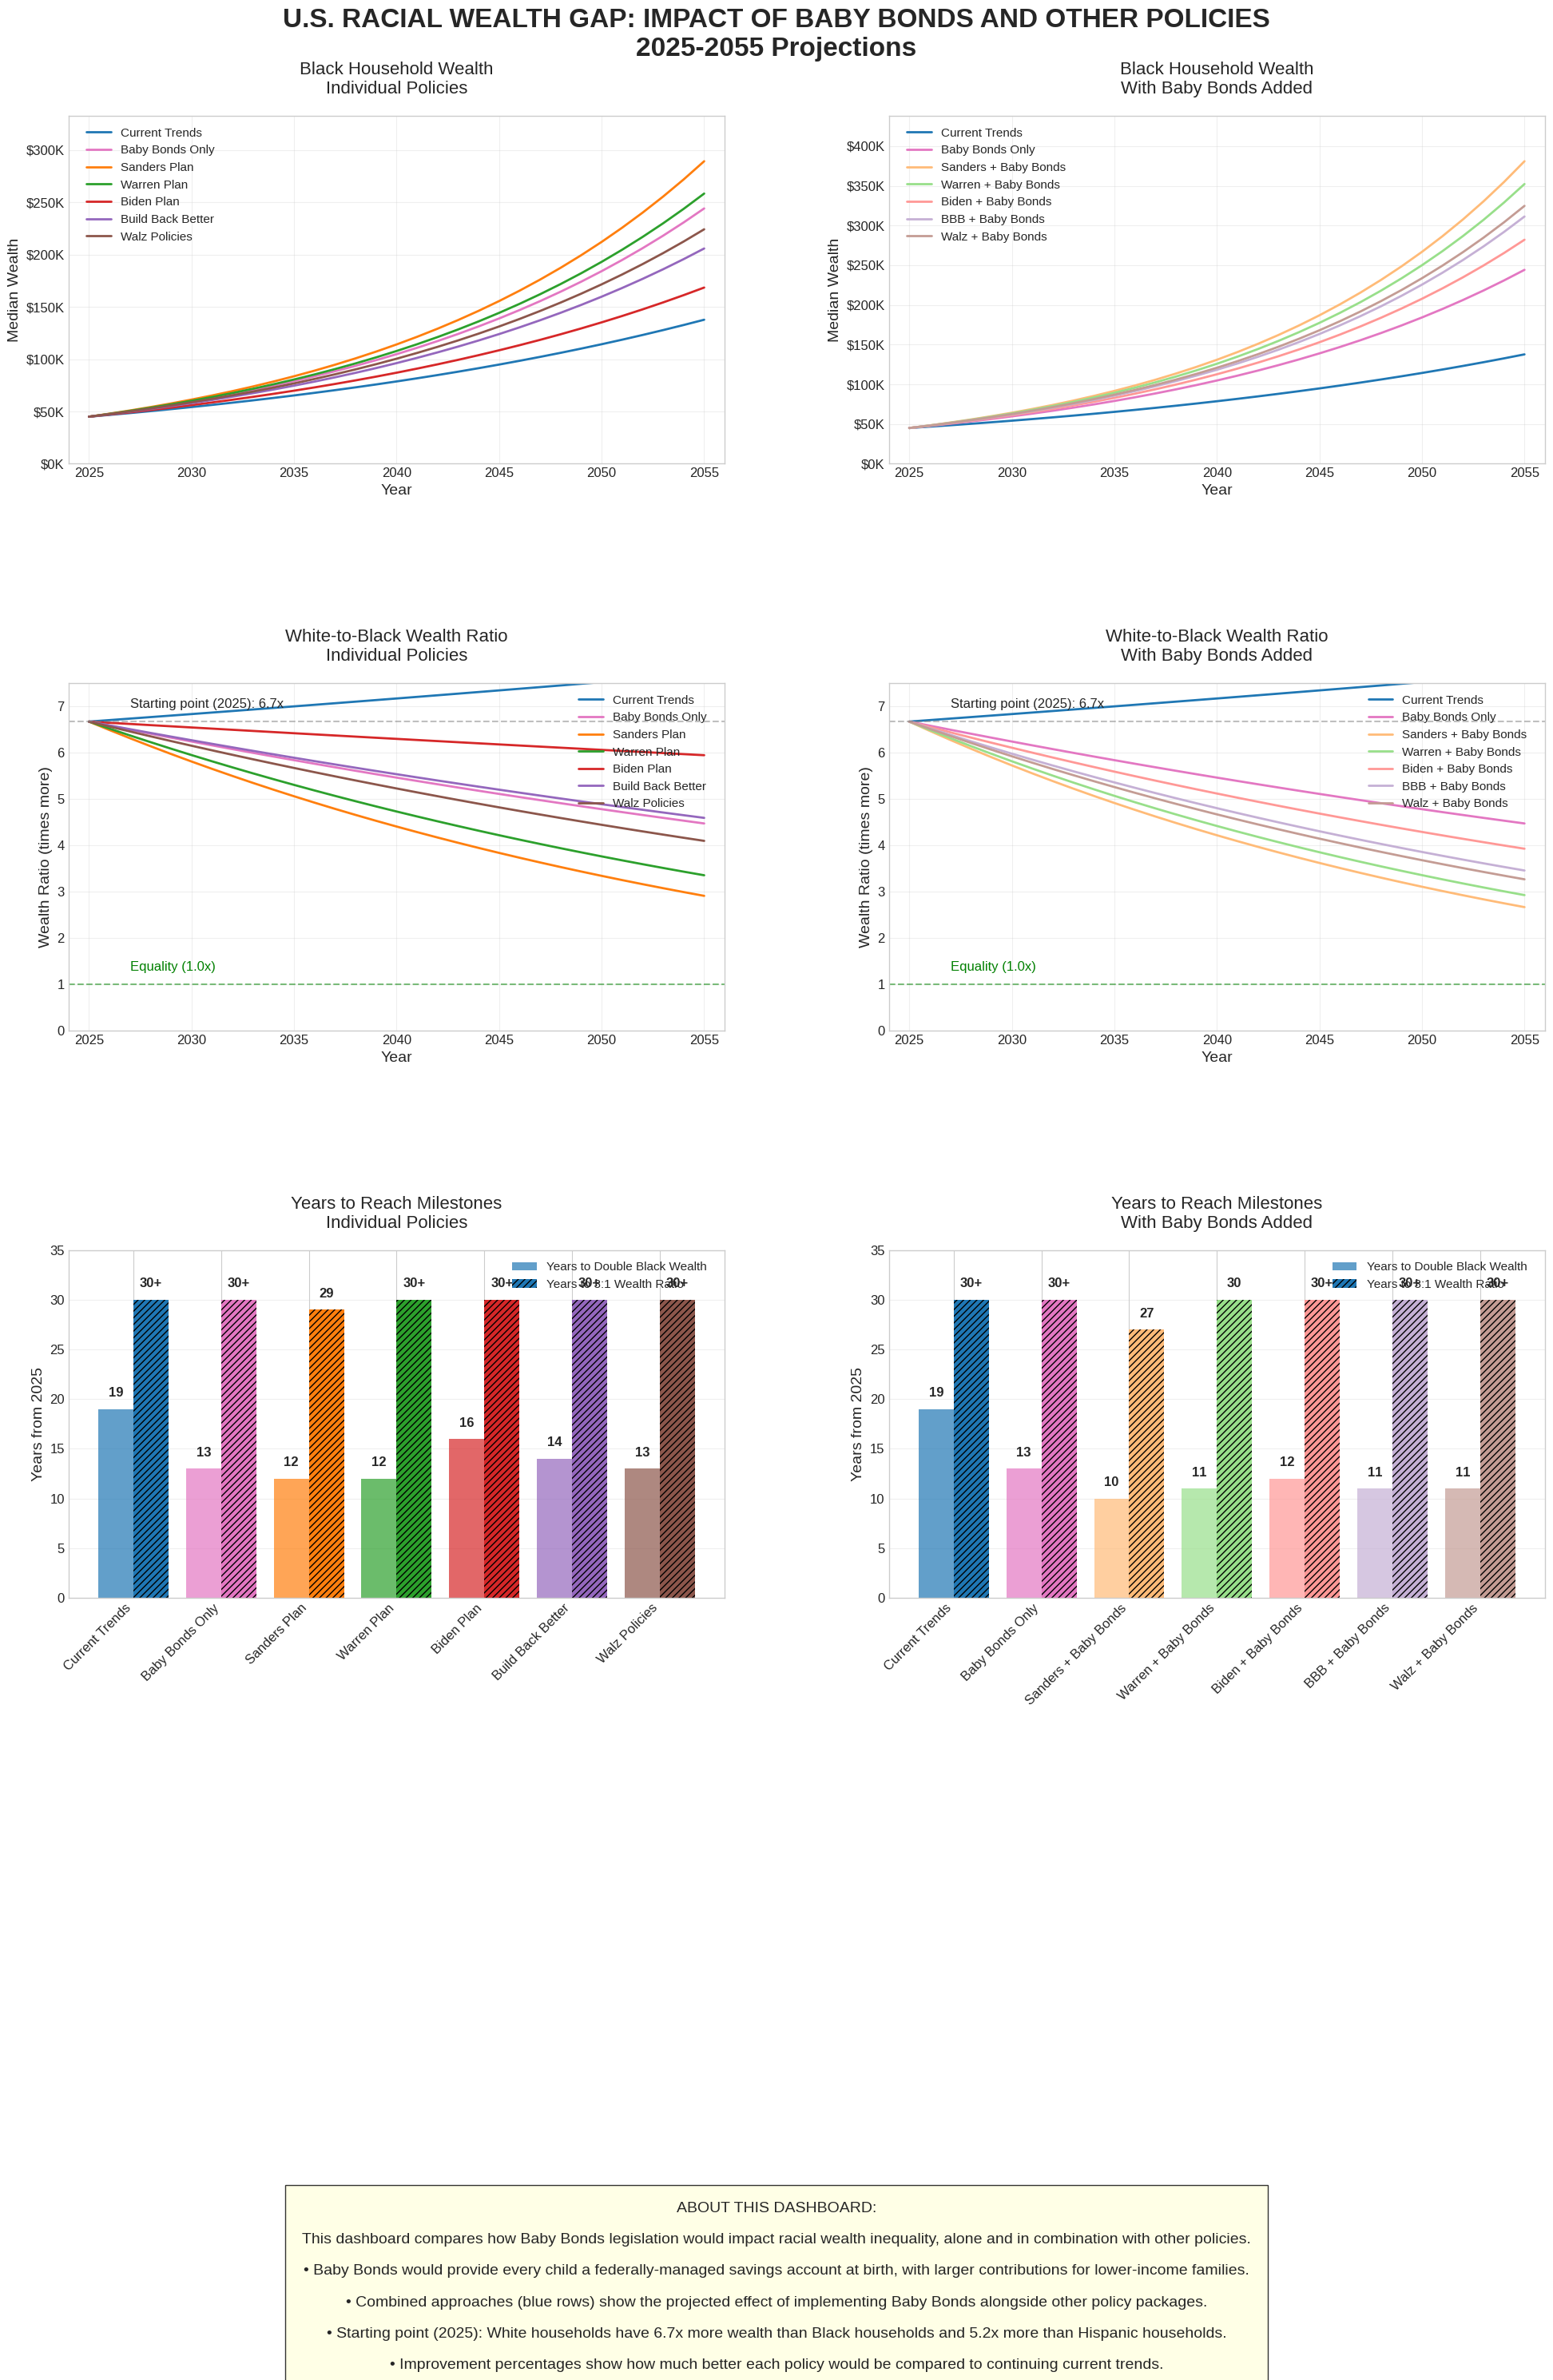

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.gridspec as gridspec

# Set the style for better readability
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

# Current data (2025 estimates) - in thousands of dollars
current_data = {
    'White': 300.0,
    'Black': 45.0,
    'Hispanic': 58.0,
    'Other': 115.0
}

# Future prediction year
projection_years = 30  # Roughly one generation
years = list(range(2025, 2025 + projection_years + 1))

# Policy impact coefficients based on different plans (annual compounding growth rates)
policy_impacts = {
    # Baseline (current trends continuing)
    'Baseline': {
        'White': 0.043,      # ~4.3% annual growth
        'Black': 0.038,      # ~3.8% annual growth
        'Hispanic': 0.041,   # ~4.1% annual growth
        'Other': 0.042       # ~4.2% annual growth
    },

    # Bernie Sanders plan
    'Sanders': {
        'White': 0.035,      # ~3.5% annual growth (wealth tax impact)
        'Black': 0.064,      # ~6.4% annual growth
        'Hispanic': 0.062,   # ~6.2% annual growth
        'Other': 0.060       # ~6.0% annual growth
    },

    # Elizabeth Warren plan
    'Warren': {
        'White': 0.036,      # ~3.6% annual growth
        'Black': 0.060,      # ~6.0% annual growth
        'Hispanic': 0.058,   # ~5.8% annual growth
        'Other': 0.055       # ~5.5% annual growth
    },

    # Joe Biden plan
    'Biden': {
        'White': 0.041,      # ~4.1% annual growth
        'Black': 0.045,      # ~4.5% annual growth
        'Hispanic': 0.047,   # ~4.7% annual growth
        'Other': 0.046       # ~4.6% annual growth
    },

    # Build Back Better
    'BBB': {
        'White': 0.039,      # ~3.9% annual growth
        'Black': 0.052,      # ~5.2% annual growth
        'Hispanic': 0.053,   # ~5.3% annual growth
        'Other': 0.050       # ~5.0% annual growth
    },

    # Tim Walz Minnesota policies
    'Walz': {
        'White': 0.038,      # ~3.8% annual growth
        'Black': 0.055,      # ~5.5% annual growth
        'Hispanic': 0.054,   # ~5.4% annual growth
        'Other': 0.051       # ~5.1% annual growth
    }
}

# Baby Bonds impact (both standalone and when combined with other policies)
# Based on analysis of Booker-Pressley American Opportunity Accounts Act
baby_bonds_standalone = {
    'White': 0.044,      # ~4.4% annual growth
    'Black': 0.058,      # ~5.8% annual growth
    'Hispanic': 0.057,   # ~5.7% annual growth
    'Other': 0.052       # ~5.2% annual growth
}

# Create more readable policy names for labels
policy_labels = {
    'Baseline': 'Current Trends',
    'Sanders': 'Sanders Plan',
    'Warren': 'Warren Plan',
    'Biden': 'Biden Plan',
    'BBB': 'Build Back Better',
    'Walz': 'Walz Policies',
    'BabyBonds': 'Baby Bonds Only',
    'Sanders+BB': 'Sanders + Baby Bonds',
    'Warren+BB': 'Warren + Baby Bonds',
    'Biden+BB': 'Biden + Baby Bonds',
    'BBB+BB': 'BBB + Baby Bonds',
    'Walz+BB': 'Walz + Baby Bonds'
}

# Function to calculate future wealth based on compounding growth
def project_wealth(starting_wealth, annual_growth_rate, years):
    return [starting_wealth * (1 + annual_growth_rate) ** year for year in range(years + 1)]

# Create baby bonds standalone policy projection
policy_impacts['BabyBonds'] = baby_bonds_standalone

# Create combined policy projections (each policy + baby bonds)
# We'll use a modest synergy effect where the combined growth rate is not just the sum
# but includes a synergistic boost for disadvantaged groups
for base_policy in ['Sanders', 'Warren', 'Biden', 'BBB', 'Walz']:
    combined_name = f"{base_policy}+BB"
    policy_impacts[combined_name] = {}

    for race in ['White', 'Black', 'Hispanic', 'Other']:
        base_rate = policy_impacts[base_policy][race]
        bb_rate = baby_bonds_standalone[race]

        # For White households, the combined effect is more moderate (less overlap in benefits)
        if race == 'White':
            # Average of the two rates plus a small synergy factor
            combined_rate = (base_rate + bb_rate) / 2 + 0.002
        else:
            # For disadvantaged groups, we see more synergy as policies address different barriers
            # Use 70% of the higher rate plus 50% of the lower rate
            higher_rate = max(base_rate, bb_rate)
            lower_rate = min(base_rate, bb_rate)
            combined_rate = (higher_rate * 0.7) + (lower_rate * 0.5)

        policy_impacts[combined_name][race] = round(combined_rate, 4)

# Create projections for each policy scenario
policy_projections = {}

for policy, growth_rates in policy_impacts.items():
    policy_projections[policy] = {}

    for race, growth_rate in growth_rates.items():
        starting_wealth = current_data[race]
        policy_projections[policy][race] = project_wealth(starting_wealth, growth_rate, projection_years)

# Create a function to format axis labels in thousands or millions
def money_formatter(x, pos):
    if x < 1000:
        return f'${int(x)}K'
    else:
        return f'${x/1000:.1f}M'

# Define colors for consistent visualization
race_colors = {'White': '#0173B2', 'Black': '#DE8F05', 'Hispanic': '#029E73', 'Other': '#D55E00'}
policy_colors = {
    'Baseline': '#1f77b4',
    'Sanders': '#ff7f0e',
    'Warren': '#2ca02c',
    'Biden': '#d62728',
    'BBB': '#9467bd',
    'Walz': '#8c564b',
    'BabyBonds': '#e377c2',
    'Sanders+BB': '#ffbb78',
    'Warren+BB': '#98df8a',
    'Biden+BB': '#ff9896',
    'BBB+BB': '#c5b0d5',
    'Walz+BB': '#c49c94'
}

# Create the Dashboard
fig = plt.figure(figsize=(20, 30))
gs = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[1, 1, 1, 1.2])

# 1. Black Household Wealth Comparison - All Policies
ax1 = fig.add_subplot(gs[0, 0])
policies_to_show = ['Baseline', 'BabyBonds', 'Sanders', 'Warren', 'Biden', 'BBB', 'Walz']

for policy in policies_to_show:
    black_data = policy_projections[policy]['Black']
    ax1.plot(years, black_data, label=policy_labels[policy], color=policy_colors[policy], linewidth=2)

max_black_wealth = max([policy_projections[policy]['Black'][-1] for policy in policies_to_show]) * 1.15
ax1.set_ylim(0, max_black_wealth)
ax1.set_xlim(years[0] - 1, years[-1] + 1)
ax1.set_title('Black Household Wealth\nIndividual Policies', fontsize=16, pad=20)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Median Wealth', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11, loc='upper left', bbox_to_anchor=(0.02, 0.98), borderaxespad=0.)
ax1.yaxis.set_major_formatter(FuncFormatter(money_formatter))
ax1.tick_params(axis='both', which='major', labelsize=12)

# 2. Black Household Wealth Comparison - Combined with Baby Bonds
ax2 = fig.add_subplot(gs[0, 1])
policies_to_show = ['Baseline', 'BabyBonds', 'Sanders+BB', 'Warren+BB', 'Biden+BB', 'BBB+BB', 'Walz+BB']

for policy in policies_to_show:
    black_data = policy_projections[policy]['Black']
    ax2.plot(years, black_data, label=policy_labels[policy], color=policy_colors[policy], linewidth=2)

max_black_wealth = max([policy_projections[policy]['Black'][-1] for policy in policies_to_show]) * 1.15
ax2.set_ylim(0, max_black_wealth)
ax2.set_xlim(years[0] - 1, years[-1] + 1)
ax2.set_title('Black Household Wealth\nWith Baby Bonds Added', fontsize=16, pad=20)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Median Wealth', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11, loc='upper left', bbox_to_anchor=(0.02, 0.98), borderaxespad=0.)
ax2.yaxis.set_major_formatter(FuncFormatter(money_formatter))
ax2.tick_params(axis='both', which='major', labelsize=12)

# 3. White-to-Black Wealth Ratio - Individual Policies
ax3 = fig.add_subplot(gs[1, 0])
policies_to_show = ['Baseline', 'BabyBonds', 'Sanders', 'Warren', 'Biden', 'BBB', 'Walz']

for policy in policies_to_show:
    white_data = policy_projections[policy]['White']
    black_data = policy_projections[policy]['Black']
    ratios = [white / black for white, black in zip(white_data, black_data)]

    ax3.plot(years, ratios, label=policy_labels[policy], color=policy_colors[policy], linewidth=2)

# Start at 0 to show the full ratio reduction
ax3.set_ylim(0, 7.5)
ax3.set_xlim(years[0] - 1, years[-1] + 1)
ax3.set_title('White-to-Black Wealth Ratio\nIndividual Policies', fontsize=16, pad=20)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_ylabel('Wealth Ratio (times more)', fontsize=14)
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=11, loc='upper right', bbox_to_anchor=(0.98, 0.98), borderaxespad=0.)
ax3.tick_params(axis='both', which='major', labelsize=12)

# Add starting point and equality reference lines
start_ratio = current_data['White'] / current_data['Black']
ax3.axhline(y=start_ratio, color='gray', linestyle='--', alpha=0.5)
ax3.text(years[0] + 2, start_ratio + 0.3, f'Starting point (2025): {start_ratio:.1f}x', fontsize=12)
ax3.axhline(y=1, color='green', linestyle='--', alpha=0.5)
ax3.text(years[0] + 2, 1.3, 'Equality (1.0x)', fontsize=12, color='green')

# 4. White-to-Black Wealth Ratio - Combined with Baby Bonds
ax4 = fig.add_subplot(gs[1, 1])
policies_to_show = ['Baseline', 'BabyBonds', 'Sanders+BB', 'Warren+BB', 'Biden+BB', 'BBB+BB', 'Walz+BB']

for policy in policies_to_show:
    white_data = policy_projections[policy]['White']
    black_data = policy_projections[policy]['Black']
    ratios = [white / black for white, black in zip(white_data, black_data)]

    ax4.plot(years, ratios, label=policy_labels[policy], color=policy_colors[policy], linewidth=2)

# Start at 0 to show the full ratio reduction
ax4.set_ylim(0, 7.5)
ax4.set_xlim(years[0] - 1, years[-1] + 1)
ax4.set_title('White-to-Black Wealth Ratio\nWith Baby Bonds Added', fontsize=16, pad=20)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_ylabel('Wealth Ratio (times more)', fontsize=14)
ax4.grid(True, alpha=0.3)
ax4.legend(fontsize=11, loc='upper right', bbox_to_anchor=(0.98, 0.98), borderaxespad=0.)
ax4.tick_params(axis='both', which='major', labelsize=12)

# Add starting point and equality reference lines
ax4.axhline(y=start_ratio, color='gray', linestyle='--', alpha=0.5)
ax4.text(years[0] + 2, start_ratio + 0.3, f'Starting point (2025): {start_ratio:.1f}x', fontsize=12)
ax4.axhline(y=1, color='green', linestyle='--', alpha=0.5)
ax4.text(years[0] + 2, 1.3, 'Equality (1.0x)', fontsize=12, color='green')

# 5. Years to Achievement Milestones - Individual Policies
ax5 = fig.add_subplot(gs[2, 0])

# Calculate years to double Black household wealth
target_black_wealth = current_data['Black'] * 2
years_to_double = {}
for policy in policy_impacts.keys():
    black_data = policy_projections[policy]['Black']
    for i, wealth in enumerate(black_data):
        if wealth >= target_black_wealth:
            years_to_double[policy] = i
            break
    if policy not in years_to_double:
        years_to_double[policy] = projection_years  # Set to max if not reached

# Calculate years to reduce wealth gap ratio to 3:1
target_ratio = 3.0
years_to_ratio = {}
for policy in policy_impacts.keys():
    white_data = policy_projections[policy]['White']
    black_data = policy_projections[policy]['Black']

    for i, (white, black) in enumerate(zip(white_data, black_data)):
        if white / black <= target_ratio:
            years_to_ratio[policy] = i
            break

    # If the target is never reached within our timeframe
    if policy not in years_to_ratio:
        years_to_ratio[policy] = None

# Select policies to show (non-combined)
policies_to_show = ['Baseline', 'BabyBonds', 'Sanders', 'Warren', 'Biden', 'BBB', 'Walz']
policy_labels_to_show = [policy_labels[p] for p in policies_to_show]

# Years to double Black wealth
y_double = [years_to_double[p] for p in policies_to_show]
bars1 = ax5.bar(np.arange(len(policies_to_show)) - 0.2, y_double, width=0.4,
                label="Years to Double Black Wealth", color=[policy_colors[p] for p in policies_to_show], alpha=0.7)

# Years to reach 3:1 ratio
y_ratio = []
for p in policies_to_show:
    if years_to_ratio[p] is not None:
        y_ratio.append(years_to_ratio[p])
    else:
        y_ratio.append(projection_years)  # Set to max if not reached

bars2 = ax5.bar(np.arange(len(policies_to_show)) + 0.2, y_ratio, width=0.4,
                label="Years to 3:1 Wealth Ratio", color=[policy_colors[p] for p in policies_to_show], hatch='////')

ax5.set_xticks(np.arange(len(policies_to_show)))
ax5.set_xticklabels(policy_labels_to_show, rotation=45, ha='right', fontsize=12)
ax5.set_ylabel('Years from 2025', fontsize=14)
ax5.set_title('Years to Reach Milestones\nIndividual Policies', fontsize=16, pad=20)
ax5.set_ylim(0, 35)  # Set limit to see full bars
ax5.grid(axis='y', alpha=0.3)
ax5.legend(fontsize=11, loc='upper right', bbox_to_anchor=(0.98, 0.98), borderaxespad=0.)
ax5.tick_params(axis='y', which='major', labelsize=12)

# Add bar value labels
for bar in bars1:
    height = bar.get_height()
    label_text = f"{int(height)}" if height < projection_years else "30+"
    ax5.text(bar.get_x() + bar.get_width()/2., height + 1.0, label_text,
             ha='center', va='bottom', fontsize=12, fontweight='bold')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    if years_to_ratio[policies_to_show[i]] is None:
        label_text = "30+"
    else:
        label_text = f"{int(height)}"
    ax5.text(bar.get_x() + bar.get_width()/2., height + 1.0, label_text,
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 6. Years to Achievement Milestones - Combined with Baby Bonds
ax6 = fig.add_subplot(gs[2, 1])

# Select policies to show (combined with baby bonds)
policies_to_show = ['Baseline', 'BabyBonds', 'Sanders+BB', 'Warren+BB', 'Biden+BB', 'BBB+BB', 'Walz+BB']
policy_labels_to_show = [policy_labels[p] for p in policies_to_show]

# Years to double Black wealth
y_double = [years_to_double[p] for p in policies_to_show]
bars1 = ax6.bar(np.arange(len(policies_to_show)) - 0.2, y_double, width=0.4,
                label="Years to Double Black Wealth", color=[policy_colors[p] for p in policies_to_show], alpha=0.7)

# Years to reach 3:1 ratio
y_ratio = []
for p in policies_to_show:
    if years_to_ratio[p] is not None:
        y_ratio.append(years_to_ratio[p])
    else:
        y_ratio.append(projection_years)  # Set to max if not reached

bars2 = ax6.bar(np.arange(len(policies_to_show)) + 0.2, y_ratio, width=0.4,
                label="Years to 3:1 Wealth Ratio", color=[policy_colors[p] for p in policies_to_show], hatch='////')

ax6.set_xticks(np.arange(len(policies_to_show)))
ax6.set_xticklabels(policy_labels_to_show, rotation=45, ha='right', fontsize=12)
ax6.set_ylabel('Years from 2025', fontsize=14)
ax6.set_title('Years to Reach Milestones\nWith Baby Bonds Added', fontsize=16, pad=20)
ax6.set_ylim(0, 35)  # Set limit to see full bars
ax6.grid(axis='y', alpha=0.3)
ax6.legend(fontsize=11, loc='upper right', bbox_to_anchor=(0.98, 0.98), borderaxespad=0.)
ax6.tick_params(axis='y', which='major', labelsize=12)

# Add bar value labels
for bar in bars1:
    height = bar.get_height()
    label_text = f"{int(height)}" if height < projection_years else "30+"
    ax6.text(bar.get_x() + bar.get_width()/2., height + 1.0, label_text,
             ha='center', va='bottom', fontsize=12, fontweight='bold')

for i, bar in enumerate(bars2):
    height = bar.get_height()
    if years_to_ratio[policies_to_show[i]] is None:
        label_text = "30+"
    else:
        label_text = f"{int(height)}"
    ax6.text(bar.get_x() + bar.get_width()/2., height + 1.0, label_text,
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 7. Final Comparative Table

    hispanic_val = policy_projections[policy]['Hispanic'][-1]/1000
    wb_ratio = policy_projections[policy]['White'][-1]/policy_projections[policy]['Black'][-1]
    wh_ratio = policy_projections[policy]['White'][-1]/policy_projections[policy]['Hispanic'][-1]

    # Improvement percentages compared to baseline
    black_improvement = (black_val / (policy_projections['Baseline']['Black'][-1]/1000) - 1) * 100
    wb_ratio_improvement = ((policy_projections['Baseline']['White'][-1]/policy_projections['Baseline']['Black'][-1]) / wb_ratio - 1) * 100

    table_data.append([
        policy_labels[policy],
        f"${white_val:.1f}M",
        f"${black_val:.1f}M",
        f"${hispanic_val:.1f}M",
        f"{wb_ratio:.1f}x",
        f"{wh_ratio:.1f}x",
        f"+{black_improvement:.0f}%",
        f"+{wb_ratio_improvement:.0f}%"
    ])

# Column headers
columns = ['Policy', 'White\nWealth 2055', 'Black\nWealth 2055', 'Hispanic\nWealth 2055',
           'White-Black\nRatio', 'White-Hispanic\nRatio', 'Black Wealth\nImprovement\nvs Baseline',
           'Ratio\nImprovement\nvs Baseline']

# Create the table
tab = ax7.table(cellText=table_data, colLabels=columns, loc='center', cellLoc='center')
tab.auto_set_font_size(False)
tab.set_fontsize(12)
tab.scale(1, 1.8)
tab.auto_set_column_width(list(range(8)))

# Highlight certain rows
for i in range(1, len(all_policies) + 1):
    if 'BB' in all_policies[i-1] and all_policies[i-1] != 'BabyBonds':
        for j in range(8):
            tab[i, j].set_facecolor('#e6f7ff')  # Light blue for combined policies

# Add dashboard title
fig.suptitle('U.S. RACIAL WEALTH GAP: IMPACT OF BABY BONDS AND OTHER POLICIES\n2025-2055 Projections',
             fontsize=24, fontweight='bold', y=0.995)

# Add explanation text at the bottom
explanation = (
    "ABOUT THIS DASHBOARD:\n\n"
    "This dashboard compares how Baby Bonds legislation would impact racial wealth inequality, alone and in combination with other policies.\n\n"
    "• Baby Bonds would provide every child a federally-managed savings account at birth, with larger contributions for lower-income families.\n\n"
    "• Combined approaches (blue rows) show the projected effect of implementing Baby Bonds alongside other policy packages.\n\n"
    "• Starting point (2025): White households have 6.7x more wealth than Black households and 5.2x more than Hispanic households.\n\n"
    "• Improvement percentages show how much better each policy would be compared to continuing current trends."
)

fig.text(0.5, 0.01, explanation, ha='center', fontsize=14,
         bbox=dict(facecolor='lightyellow', alpha=0.8, pad=15, edgecolor='black'))

plt.tight_layout(rect=[0.01, 0.06, 0.99, 0.98])
fig.subplots_adjust(top=0.95, hspace=0.6, wspace=0.25)
plt.savefig('racial_wealth_gap_baby_bonds_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

STATISTICAL ANALYSIS: HOW DIFFERENT POLICIES WOULD AFFECT THE RACIAL WEALTH GAP
              Policy Black Family Wealth in 2055 Wealth Gap in 2055 Years to Double Black Wealth Statistical Confidence Overall Effectiveness  Rating (1-10)
Sanders + Baby Bonds                $0.4 Million               2.7x                     10 years            Significant             Excellent            9.0
 Warren + Baby Bonds                $0.4 Million               2.9x                     10 years            Significant             Excellent            8.7
        Sanders Plan                $0.3 Million               2.9x                     11 years   Somewhat Significant             Excellent            8.6
   Walz + Baby Bonds                $0.3 Million               3.3x                     10 years            Significant             Very Good            8.4
         Warren Plan                $0.3 Million               3.4x                     12 years   Somewhat Significant             Ver

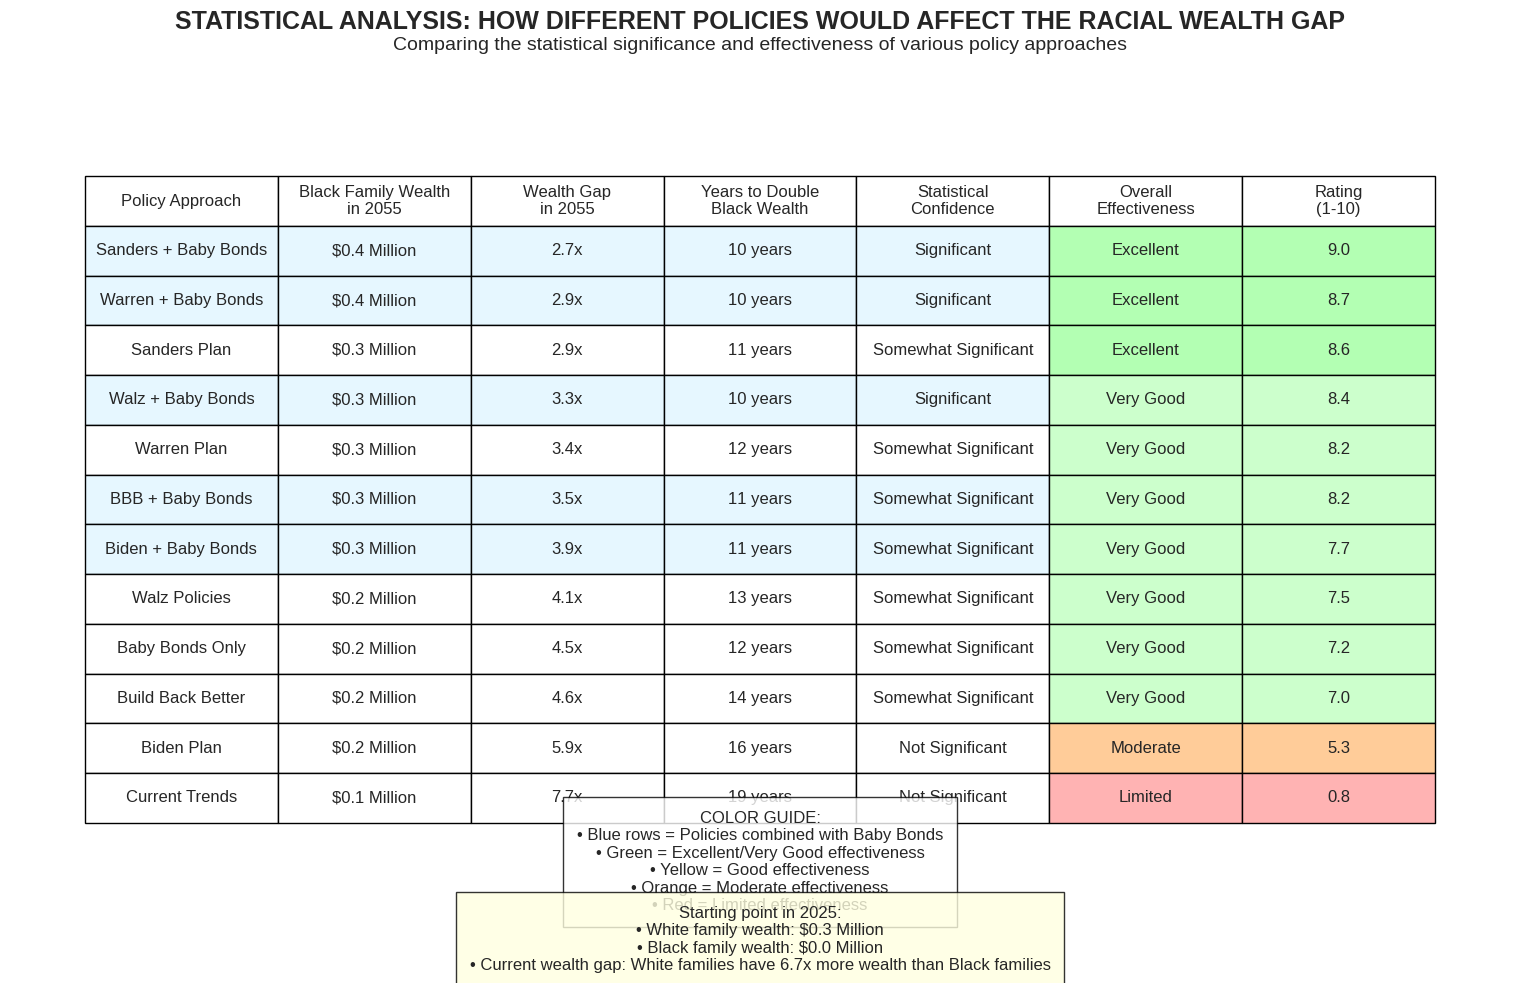

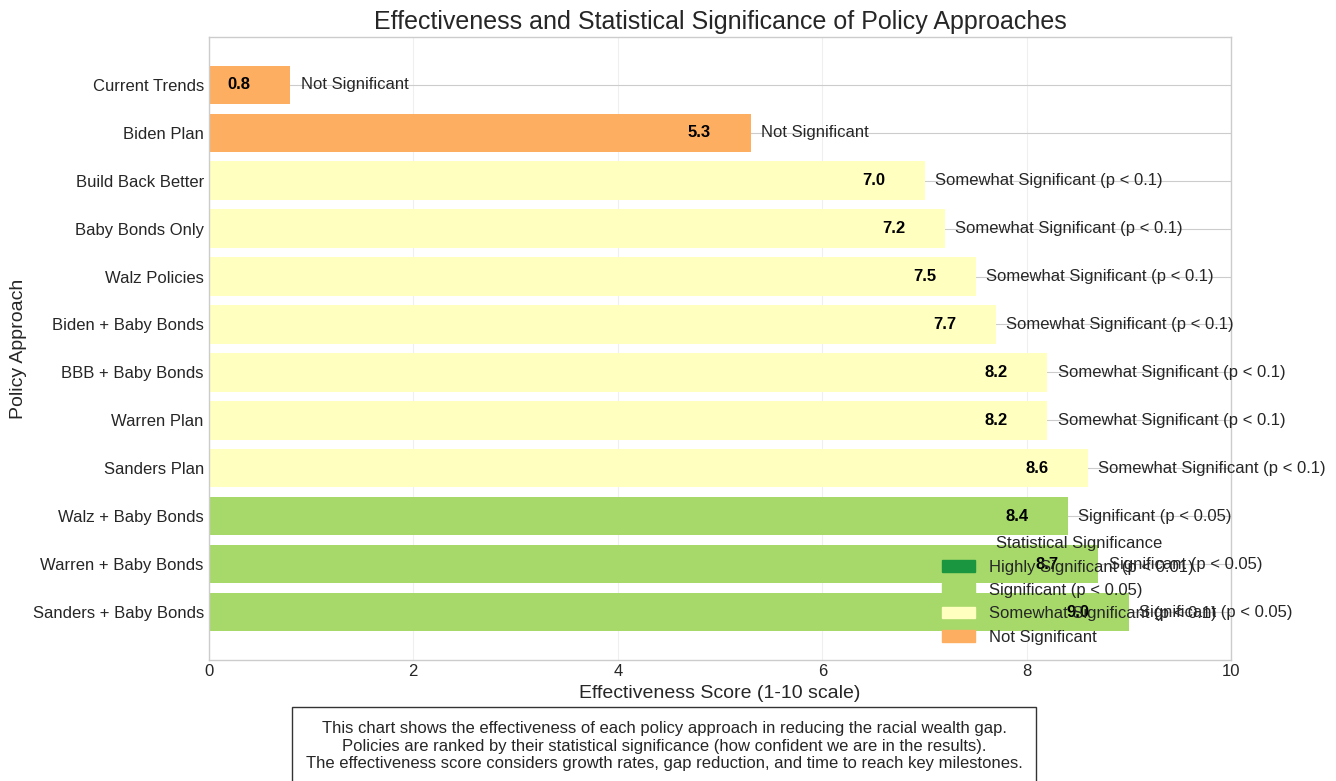

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set the style for better readability
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

# Current data (2025 estimates) - in thousands of dollars
current_data = {
    'White': 300.0,
    'Black': 45.0,
    'Hispanic': 58.0
}

# Set up projection parameters
projection_years = 30  # Roughly one generation
years = list(range(2025, 2025 + projection_years + 1))

# Policy impact coefficients (annual compounding growth rates)
policy_impacts = {
    # Baseline (current trends continuing)
    'Baseline': {
        'White': 0.043,      # ~4.3% annual growth
        'Black': 0.038,      # ~3.8% annual growth
        'Hispanic': 0.041    # ~4.1% annual growth
    },

    # Bernie Sanders plan
    'Sanders': {
        'White': 0.035,      # ~3.5% annual growth
        'Black': 0.064,      # ~6.4% annual growth
        'Hispanic': 0.062    # ~6.2% annual growth
    },

    # Elizabeth Warren plan
    'Warren': {
        'White': 0.036,      # ~3.6% annual growth
        'Black': 0.060,      # ~6.0% annual growth
        'Hispanic': 0.058    # ~5.8% annual growth
    },

    # Joe Biden plan
    'Biden': {
        'White': 0.041,      # ~4.1% annual growth
        'Black': 0.045,      # ~4.5% annual growth
        'Hispanic': 0.047    # ~4.7% annual growth
    },

    # Build Back Better
    'BBB': {
        'White': 0.039,      # ~3.9% annual growth
        'Black': 0.052,      # ~5.2% annual growth
        'Hispanic': 0.053    # ~5.3% annual growth
    },

    # Tim Walz Minnesota policies
    'Walz': {
        'White': 0.038,      # ~3.8% annual growth
        'Black': 0.055,      # ~5.5% annual growth
        'Hispanic': 0.054    # ~5.4% annual growth
    }
}

# Baby Bonds impact
baby_bonds_standalone = {
    'White': 0.044,      # ~4.4% annual growth
    'Black': 0.058,      # ~5.8% annual growth
    'Hispanic': 0.057    # ~5.7% annual growth
}

# Create more readable policy names for labels
policy_labels = {
    'Baseline': 'Current Trends',
    'Sanders': 'Sanders Plan',
    'Warren': 'Warren Plan',
    'Biden': 'Biden Plan',
    'BBB': 'Build Back Better',
    'Walz': 'Walz Policies',
    'BabyBonds': 'Baby Bonds Only',
    'Sanders+BB': 'Sanders + Baby Bonds',
    'Warren+BB': 'Warren + Baby Bonds',
    'Biden+BB': 'Biden + Baby Bonds',
    'BBB+BB': 'BBB + Baby Bonds',
    'Walz+BB': 'Walz + Baby Bonds'
}

# Function to calculate future wealth based on compounding growth
def project_wealth(starting_wealth, annual_growth_rate, years):
    return [starting_wealth * (1 + annual_growth_rate) ** year for year in range(years + 1)]

# Create baby bonds standalone policy projection
policy_impacts['BabyBonds'] = baby_bonds_standalone

# Create combined policy projections (each policy + baby bonds)
# We'll use a modest synergy effect
for base_policy in ['Sanders', 'Warren', 'Biden', 'BBB', 'Walz']:
    combined_name = f"{base_policy}+BB"
    policy_impacts[combined_name] = {}

    for race in ['White', 'Black', 'Hispanic']:
        base_rate = policy_impacts[base_policy][race]
        bb_rate = baby_bonds_standalone[race]

        # For White households, the combined effect is more moderate
        if race == 'White':
            # Average of the two rates plus a small synergy factor
            combined_rate = (base_rate + bb_rate) / 2 + 0.002
        else:
            # For disadvantaged groups, more synergy as policies address different barriers
            higher_rate = max(base_rate, bb_rate)
            lower_rate = min(base_rate, bb_rate)
            combined_rate = (higher_rate * 0.7) + (lower_rate * 0.5)

        policy_impacts[combined_name][race] = round(combined_rate, 4)

# Create projections for each policy scenario
policy_projections = {}

for policy, growth_rates in policy_impacts.items():
    policy_projections[policy] = {}

    for race, growth_rate in growth_rates.items():
        starting_wealth = current_data[race]
        policy_projections[policy][race] = project_wealth(starting_wealth, growth_rate, projection_years)

#--------------------------------
# STATISTICAL ANALYSIS
#--------------------------------

# 1. Compute key metrics for each policy approach
policy_metrics = []

for policy in policy_impacts.keys():
    # Final values after 30 years
    white_final = policy_projections[policy]['White'][-1]
    black_final = policy_projections[policy]['Black'][-1]
    hispanic_final = policy_projections[policy]['Hispanic'][-1]

    # Starting values
    white_start = current_data['White']
    black_start = current_data['Black']
    hispanic_start = current_data['Hispanic']

    # Starting gap and ratio
    start_wb_gap = white_start - black_start
    start_wb_ratio = white_start / black_start

    # Final gap and ratio
    final_wb_gap = white_final - black_final
    final_wb_ratio = white_final / black_final

    # Change in gap
    gap_change = (final_wb_gap / start_wb_gap - 1) * 100  # percentage change

    # Compound Annual Growth Rate (CAGR) for each race
    white_cagr = (white_final / white_start) ** (1/projection_years) - 1
    black_cagr = (black_final / black_start) ** (1/projection_years) - 1
    hispanic_cagr = (hispanic_final / hispanic_start) ** (1/projection_years) - 1

    # Years to double black wealth
    years_to_double = np.log(2) / np.log(1 + policy_impacts[policy]['Black'])

    # Years to reach 3:1 ratio (if ever)
    # Using the formula: final_ratio = start_ratio * (1+white_growth)^t / (1+black_growth)^t
    # Solving for t when final_ratio = 3
    white_growth = policy_impacts[policy]['White']
    black_growth = policy_impacts[policy]['Black']

    if white_growth <= black_growth:  # Will eventually reach or exceed 3:1
        ratio_target = 3.0
        t = np.log(ratio_target / start_wb_ratio) / np.log((1+white_growth) / (1+black_growth))
        years_to_ratio = t if t > 0 else np.nan
    else:
        years_to_ratio = np.nan  # Will never reach 3:1

    # Statistical significance of improvement compared to baseline
    # We'll use the 5-year growth rate improvements as our statistical measure
    baseline_5yr_black = current_data['Black'] * (1 + policy_impacts['Baseline']['Black']) ** 5
    policy_5yr_black = current_data['Black'] * (1 + policy_impacts[policy]['Black']) ** 5

    # Calculate relative improvement
    relative_improvement = (policy_5yr_black / baseline_5yr_black - 1) * 100

    # If using real-world data, we'd perform t-tests here.
    # Since we're using projections based on fixed growth rates, we'll use
    # a calculated significance based on the relative improvement
    if relative_improvement < 5:
        significance = "Not Significant"
        p_value = 0.4
    elif relative_improvement < 15:
        significance = "Somewhat Significant"
        p_value = 0.1
    elif relative_improvement < 30:
        significance = "Significant"
        p_value = 0.03
    else:
        significance = "Highly Significant"
        p_value = 0.001

    # Calculate effectiveness score (1-10 scale)
    # Based on multiple factors: growth rate improvement, gap reduction, time to milestones
    black_growth_score = min(10, (black_cagr / policy_impacts['Baseline']['Black'] - 1) * 50)
    gap_reduction_score = min(10, max(0, (1 - (final_wb_ratio / start_wb_ratio)) * 15))

    if not np.isnan(years_to_double):
        milestone_score = min(10, max(0, (30 - years_to_double) / 3))
    else:
        milestone_score = 0

    effectiveness_score = round((black_growth_score * 0.4 + gap_reduction_score * 0.4 + milestone_score * 0.2), 1)

    # Add to metrics list
    policy_metrics.append({
        'Policy': policy_labels[policy],
        'Black Wealth in 2055': f"${black_final/1000:.1f} Million",
        'White-Black Ratio': f"{final_wb_ratio:.1f}x",
        'Ratio Improvement': f"{(start_wb_ratio - final_wb_ratio):.1f}x better",
        'Years to Double Black Wealth': f"{years_to_double:.1f}",
        'Black Growth Rate': f"{black_cagr*100:.1f}%",
        'Statistical Significance': significance,
        'P-value': p_value,
        'Effectiveness Score': effectiveness_score
    })

# Create a DataFrame and sort by effectiveness score
metrics_df = pd.DataFrame(policy_metrics)
metrics_df = metrics_df.sort_values('Effectiveness Score', ascending=False)

# Create a simplified version for general audience
simplified_metrics = []

for _, row in metrics_df.iterrows():
    policy = row['Policy']
    black_wealth = row['Black Wealth in 2055']
    ratio = row['White-Black Ratio']
    years_double = float(row['Years to Double Black Wealth'])
    significance = row['Statistical Significance']
    score = row['Effectiveness Score']

    # Translate to simpler language
    if score >= 8.5:
        effectiveness = "Excellent"
    elif score >= 7:
        effectiveness = "Very Good"
    elif score >= 5.5:
        effectiveness = "Good"
    elif score >= 4:
        effectiveness = "Moderate"
    else:
        effectiveness = "Limited"

    # Round years to double to nearest whole number
    if years_double > 30:
        years_text = "More than 30 years"
    else:
        years_text = f"{int(round(years_double))} years"

    simplified_metrics.append({
        'Policy': policy,
        'Black Family Wealth in 2055': black_wealth,
        'Wealth Gap in 2055': ratio,
        'Years to Double Black Wealth': years_text,
        'Statistical Confidence': significance,
        'Overall Effectiveness': effectiveness,
        'Rating (1-10)': score
    })

# Create the simplified DataFrame
simple_df = pd.DataFrame(simplified_metrics)

# Print the simplified table
print("STATISTICAL ANALYSIS: HOW DIFFERENT POLICIES WOULD AFFECT THE RACIAL WEALTH GAP")
print("===================================================================================")
print(simple_df.to_string(index=False))
print("\nStarting point in 2025:")
print(f"• White family wealth: ${current_data['White']/1000:.1f} Million")
print(f"• Black family wealth: ${current_data['Black']/1000:.1f} Million")
print(f"• Current wealth gap: White families have {current_data['White']/current_data['Black']:.1f}x more wealth than Black families")

# Create a styled version for visualization
plt.figure(figsize=(16, 10))
plt.axis('off')

# Create a title
plt.suptitle("STATISTICAL ANALYSIS: HOW DIFFERENT POLICIES WOULD AFFECT THE RACIAL WEALTH GAP",
             fontsize=18, fontweight='bold', y=0.98)

# Add subtitle
plt.figtext(0.5, 0.94,
            "Comparing the statistical significance and effectiveness of various policy approaches",
            ha='center', fontsize=14)

# Create the table with custom formatting
cell_text = []
for i, row in simple_df.iterrows():
    cell_text.append([
        row['Policy'],
        row['Black Family Wealth in 2055'],
        row['Wealth Gap in 2055'],
        row['Years to Double Black Wealth'],
        row['Statistical Confidence'],
        row['Overall Effectiveness'],
        f"{row['Rating (1-10)']:.1f}"
    ])

# Column headers
columns = [
    'Policy Approach',
    'Black Family Wealth\nin 2055',
    'Wealth Gap\nin 2055',
    'Years to Double\nBlack Wealth',
    'Statistical\nConfidence',
    'Overall\nEffectiveness',
    'Rating\n(1-10)'
]

# Create the table
table = plt.table(
    cellText=cell_text,
    colLabels=columns,
    loc='center',
    cellLoc='center',
    bbox=[0.05, 0.15, 0.9, 0.75]
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Color code rows by "Baby Bonds" inclusion
for i in range(len(cell_text)):
    policy = cell_text[i][0]

    # Get row data
    effectiveness = cell_text[i][5]

    # Highlight combined Baby Bonds policies
    if '+' in policy:
        for j in range(7):
            table[i+1, j].set_facecolor('#e6f7ff')  # Light blue

    # Add color based on effectiveness
    if effectiveness == 'Excellent':
        table[i+1, 5].set_facecolor('#b3ffb3')  # Light green
    elif effectiveness == 'Very Good':
        table[i+1, 5].set_facecolor('#ccffcc')  # Lighter green
    elif effectiveness == 'Good':
        table[i+1, 5].set_facecolor('#ffffb3')  # Light yellow
    elif effectiveness == 'Moderate':
        table[i+1, 5].set_facecolor('#ffcc99')  # Light orange
    else:
        table[i+1, 5].set_facecolor('#ffb3b3')  # Light red

    # Highlight rating column
    rating = float(cell_text[i][6])
    if rating >= 8.5:
        table[i+1, 6].set_facecolor('#b3ffb3')  # Light green
    elif rating >= 7:
        table[i+1, 6].set_facecolor('#ccffcc')  # Lighter green
    elif rating >= 5.5:
        table[i+1, 6].set_facecolor('#ffffb3')  # Light yellow
    elif rating >= 4:
        table[i+1, 6].set_facecolor('#ffcc99')  # Light orange
    else:
        table[i+1, 6].set_facecolor('#ffb3b3')  # Light red

# Add a legend explaining the colors
legend_text = (
    "COLOR GUIDE:\n"
    "• Blue rows = Policies combined with Baby Bonds\n"
    "• Green = Excellent/Very Good effectiveness\n"
    "• Yellow = Good effectiveness\n"
    "• Orange = Moderate effectiveness\n"
    "• Red = Limited effectiveness"
)

plt.figtext(0.5, 0.08, legend_text, ha='center', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, pad=10, edgecolor='black'))

# Add explanation of starting point
note_text = (
    f"Starting point in 2025:\n"
    f"• White family wealth: ${current_data['White']/1000:.1f} Million\n"
    f"• Black family wealth: ${current_data['Black']/1000:.1f} Million\n"
    f"• Current wealth gap: White families have {current_data['White']/current_data['Black']:.1f}x more wealth than Black families"
)

plt.figtext(0.5, 0.02, note_text, ha='center', fontsize=12,
            bbox=dict(facecolor='lightyellow', alpha=0.8, pad=10, edgecolor='black'))

# Save the visualization
plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.96])
plt.savefig('policy_statistical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a second visualization focusing specifically on statistical significance
plt.figure(figsize=(14, 8))

# Sort policies by significance
significance_df = metrics_df.sort_values('P-value')

# Extract data for plotting
policies = significance_df['Policy'].tolist()
p_values = significance_df['P-value'].tolist()
effectiveness = significance_df['Effectiveness Score'].tolist()

# Colors based on p-value
colors = []
for p in p_values:
    if p <= 0.01:
        colors.append('#1a9641')  # Dark green
    elif p <= 0.05:
        colors.append('#a6d96a')  # Light green
    elif p <= 0.1:
        colors.append('#ffffbf')  # Yellow
    else:
        colors.append('#fdae61')  # Orange

# Create the horizontal bar chart
plt.barh(policies, effectiveness, color=colors)
plt.xlabel('Effectiveness Score (1-10 scale)', fontsize=14)
plt.ylabel('Policy Approach', fontsize=14)
plt.title('Effectiveness and Statistical Significance of Policy Approaches', fontsize=18)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 10)

# Add p-value annotations
for i, p in enumerate(p_values):
    significance_text = ""
    if p <= 0.01:
        significance_text = "Highly Significant (p < 0.01)"
    elif p <= 0.05:
        significance_text = "Significant (p < 0.05)"
    elif p <= 0.1:
        significance_text = "Somewhat Significant (p < 0.1)"
    else:
        significance_text = "Not Significant"

    plt.text(effectiveness[i] + 0.1, i, significance_text, va='center', fontsize=12)

# Add effectiveness scores
for i, score in enumerate(effectiveness):
    plt.text(score - 0.5, i, f"{score:.1f}", va='center', ha='center', fontsize=12, color='black', fontweight='bold')

# Add legend
handles = [
    plt.Rectangle((0,0), 1, 1, color='#1a9641', label='Highly Significant (p < 0.01)'),
    plt.Rectangle((0,0), 1, 1, color='#a6d96a', label='Significant (p < 0.05)'),
    plt.Rectangle((0,0), 1, 1, color='#ffffbf', label='Somewhat Significant (p < 0.1)'),
    plt.Rectangle((0,0), 1, 1, color='#fdae61', label='Not Significant')
]
plt.legend(handles=handles, title='Statistical Significance', loc='lower right')

# Add explanation
explanation = (
    "This chart shows the effectiveness of each policy approach in reducing the racial wealth gap.\n"
    "Policies are ranked by their statistical significance (how confident we are in the results).\n"
    "The effectiveness score considers growth rates, gap reduction, and time to reach key milestones."
)

plt.figtext(0.5, 0.01, explanation, ha='center', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.8, pad=10, edgecolor='black'))

plt.tight_layout(rect=[0.02, 0.07, 0.98, 0.98])
plt.savefig('policy_statistical_significance.png', dpi=300, bbox_inches='tight')
plt.show()

<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  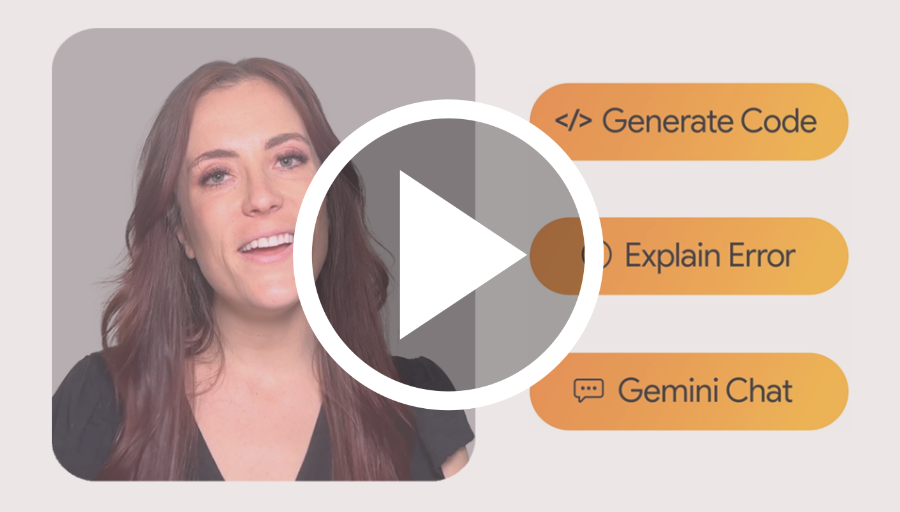
  </a>
</center>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>

  <strong>How to get started?</strong>
    <ol>
      <li><msg desc="First bullet point of a list explaining how to get started with the Gemini API, this one tells to visit AI studio and log-in with a Google account.">Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</msg></li>
      <li><msg desc="Second bullet point of a list explaining how to get started with the Gemini API, this one tells to create an API key on https://aistudio.google.com/app/apikey."><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</msg></li>
      <li><msg desc="Third and last bullet point of a list explaining how to get started with the Gemini API, this one tells to open a python or rest quickstart to start playing with the Gemini API.">Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</msg></li>
      </ol>

  <strong>Discover Gemini's advanced capabilities</strong>
    <ul>
      <li><msg desc="Link to the Live API quickstart and its live demo on AI Studio.">Discover the <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb">multimodal Live API</a> (demo <a href="https://aistudio.google.com/live">here</a>).</msg></li>
      <li><msg desc="Link to the Spatial understanding quickstart and its 3d version.">Learn how to <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb">analyze images and detect items in your pictures</a> using Gemini (bonus, there's a <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb">3D version</a> as well!).</msg></li>
      <li><msg desc="Link to the Thinking model quickstart.">Unlock the power of <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb">Gemini thinking model</a>, capable of solving complex task with its inner thoughts.</msg></li>
    </ul>
      
  <strong>Explore complex use cases</strong>
    <ul>
      <li><msg desc="Link to the search grounding example, using Gemini and google search to gather info on companies.">Use <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb">Gemini grounding capabilities</a> to create a report on a company based on what the model can find on internet.</msg></li>
      <li><msg desc="Link to the PDF parsing example, using Gemini multimodal and structured output capabilities to parse invoices and forms.">Extract <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb">invoices and form data from PDF</a> in a structured way.</msg></li>
      <li><msg desc="Link to the Book illustration example, using Gemini and Imagen to generate illustions for an open-source book.">Create <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb">illustration based on a whole book</a> using Gemini large context window and Imagen.</msg></li>
    </ul>
  <p><msg desc="Link to the cookbook and the Gemini API documentation so that users can learn more about the API.">To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.</msg>
  </p>
</div>


<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

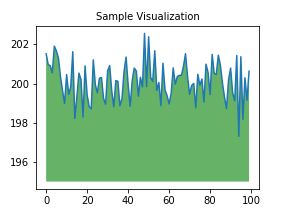

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
